# Import thư viện


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
from matplotlib import ticker
import warnings

warnings.filterwarnings("ignore")


# Đọc dữ liệu vào `df`


In [ ]:
df = pd.read_csv("../Data/hotel_bookings.csv")
df


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


# Ý nghĩa các cột


### hotel

Có 2 giá trị: Resort Hotel và City Hotel

### is_canceled

1: bị canceled

0: ko bị

### lead_time

Số ngày trôi qua giữa ngày đặt phòng được nhập vào hệ thống PMS và ngày đến của khách.

### arrival_date_year

năm của ngày đến

### arrival_date_month

tháng của ngày đến

### arrival_date_week_number

Số tuần trong năm tương ứng với ngày đến.

### arrival_date_day_of_month

Ngày của ngày đến

### stays_in_weekend_nights

Số đêm cuối tuần (thứ Bảy hoặc Chủ Nhật) mà khách đã lưu trú hoặc đặt để lưu trú tại khách sạn.

### stays_in_week_nights

Số đêm trong tuần (thứ Hai đến Sáu) mà khách đã lưu trú hoặc đặt để lưu trú tại khách sạn.

### adults

Số lượng người lớn

### children

Số lượng trẻ nhỏ

### babies

Số lượng babies

### meal

Loại bữa ăn đã đặt. Các loại bữa ăn được trình bày theo các gói bữa ăn tiêu chuẩn trong ngành khách sạn:

- **Undefined/SC** – Không có gói bữa ăn (Self-Catering: khách tự lo bữa ăn).
- **BB** – Bed & Breakfast (Chỉ bao gồm bữa sáng).
- **HB** – Half board (Bữa sáng và một bữa ăn khác – thường là bữa tối).
- **FB** – Full board (Bữa sáng, bữa trưa và bữa tối).

### country

Quốc gia xuất xứ. Các quốc gia được biểu diễn theo định dạng tiêu chuẩn **ISO 3166-1 alpha-3:2013**, gồm mã ba chữ cái đại diện cho từng quốc gia.

### market_segment

**Phân khúc thị trường**. Trong các danh mục, thuật ngữ **"TA"** có nghĩa là **"Đại lý du lịch"** và **"TO"** có nghĩa là **"Tour Operators"** (Nhà điều hành tour)
→ phân loại khách theo đối tượng

### distribution_channel

**Kênh phân phối đặt phòng**. Thuật ngữ **"TA"** có nghĩa là **"Đại lý du lịch"** và **"TO"** có nghĩa là **"Nhà điều hành tour"**.
→ khách sạn xác định được cách thức khách hàng tìm đến và đặt dịch vụ.

### is_repeated_guest

1: khách hàng đã từng ở khách sạn

0: chưa

### previous_cancellations

Số lần đặt phòng trước đó đã bị khách hàng hủy trước khi đặt phòng hiện tại.

### previous_bookings_not_canceled

Số lần đặt phòng trước đó không bị khách hàng hủy trước khi đặt phòng hiện tại.

### reserved_room_type

Mã loại phòng đã đặt. Mã được sử dụng thay vì tên gọi để đảm bảo tính ẩn danh.

### assigned_room_type

Mã loại phòng được chỉ định cho việc đặt phòng. Đôi khi, loại phòng được chỉ định có thể khác với loại phòng đã đặt do lý do vận hành của khách sạn (ví dụ: thừa phòng) hoặc theo yêu cầu của khách hàng. Mã này được sử dụng thay vì tên gọi để đảm bảo tính ẩn danh.

### booking_changes

Số lần thay đổi/sửa đổi đã được thực hiện đối với việc đặt phòng kể từ khi đặt phòng được nhập vào hệ thống PMS cho đến khi khách làm thủ tục nhận phòng hoặc hủy phòng.

### deposit_type

Chỉ thị về việc khách hàng đã đặt cọc để đảm bảo việc đặt phòng hay không. Biến này có thể có ba giá trị:

- **No Deposit** – Không có đặt cọc.
- **Non Refund** – Đặt cọc và không được hoàn tiền lại
- **Refundable** – Đặt cọc đã được thực hiện với giá trị thấp hơn tổng chi phí lưu trú và có thể hoàn lại.

### agent

Mã ID của đại lý du lịch đã thực hiện việc đặt phòng → khách hàng là đại lý du lịch

### company

Mã ID của công ty/thực thể đã thực hiện việc đặt phòng hoặc chịu trách nhiệm thanh toán cho việc đặt phòng. Mã này được sử dụng thay vì tên gọi để đảm bảo tính ẩn danh.

### days_in_waiting_list

Số ngày mà việc đặt phòng nằm trong danh sách chờ trước khi được xác nhận với khách hàng.

Khi khách hàng đặt phòng, nhưng khách sạn không có phòng trống đủ để đáp ứng yêu cầu (do hết phòng hoặc vì lý do khác), khách sạn có thể đưa đặt phòng vào **danh sách chờ**.

### customer_type

Loại đặt phòng, được chia thành một trong bốn loại sau:

- **Contract** – Khi đặt phòng có hợp đồng hoặc loại hợp đồng khác liên quan đến nó (thường là hợp đồng đã được ký kết với khách sạn về số lượng phòng hoặc điều kiện đặc biệt).
- **Group** – Khi đặt phòng liên quan đến một nhóm (thường là đặt phòng cho một nhóm khách, có thể là một tour du lịch hoặc sự kiện).
- **Transient** – Khi đặt phòng không thuộc nhóm hoặc hợp đồng nào và không liên quan đến các đặt phòng tạm thời khác.
- **Transient-party** – Khi đặt phòng là loại tạm thời (transient), nhưng lại liên kết với ít nhất một đặt phòng tạm thời khác (có thể là các khách trong cùng một nhóm nhưng không phải nhóm chính thức).

### adr

**Giá trung bình mỗi ngày (Average Daily Rate - ADR)** được định nghĩa bằng cách chia tổng giá trị của tất cả các giao dịch lưu trú cho tổng số đêm lưu trú.

### required_car_parking_spaces

Số lượng chỗ đậu xe yêu cầu bởi khách hàng.

### total_of_special_requests

Số lương yêu cầu đặc biệt từ khách hàng (twin bed hoặc high floor)

### reservation_status

Trạng thái cuối cùng của đặt phòng, được chia thành ba loại sau:

- **Canceled** – Đặt phòng đã bị hủy bởi khách hàng.
- **Check-Out** – Khách hàng đã nhận phòng nhưng đã rời đi.
- **No-Show** – Khách hàng không đến nhận phòng và không thông báo lý do cho khách sạn.

### reservation_status_date

Ngày mà trạng thái cuối cùng được thiết lập. Biến này có thể được sử dụng kết hợp với **ReservationStatus** để hiểu khi nào việc đặt phòng bị hủy hoặc khi nào khách hàng đã làm thủ tục trả phòng tại khách sạn.


# Tiền xử lí dữ liệu


## Tiến hành loại bỏ các cột không cần thiết và gộp các cột nào mà gộp được trước

### Loại bỏ 2 cột `agent`, `company`


In [3]:
df.drop(columns=["agent", "company"], inplace=True)


### Tiến hành gộp các cột `arrival_date_day_of_month`, `arrival_date_month`, `arrival_date_year` thành 1 cột `arrival_date`

- Loại bỏ 3 cột trên và cột `arrival_date_week_number`


In [4]:
# Xử lí cột tháng
def change_df(df):
    dict_number_by_month = {
        "January": 1,
        "February": 2,
        "March": 3,
        "April": 4,
        "May": 5,
        "June": 6,
        "July": 7,
        "August": 8,
        "September": 9,
        "October": 10,
        "November": 11,
        "December": 12,
    }

    df["arrival_date_month"] = df["arrival_date_month"].apply(
        lambda x: dict_number_by_month[x]
    )


change_df(df)

# Tạo cột mới arrival_date
df["arrival_date"] = (
    df["arrival_date_day_of_month"].astype(str)
    + "-"
    + df["arrival_date_month"].astype(str)
    + "-"
    + df["arrival_date_year"].astype(str)
)
df["arrival_date"] = pd.to_datetime(df["arrival_date"], format="%d-%m-%Y")

# Bỏ các cột đi
df.drop(
    columns=[
        "arrival_date_day_of_month",
        "arrival_date_month",
        "arrival_date_year",
        "arrival_date_week_number",
    ],
    inplace=True,
)


## Kiểm tra có dòng trùng không


In [ ]:
any(df.duplicated() == True)


True

## Tìm các dòng trùng


In [ ]:
duplicated_rows = df[df.duplicated() == True]
duplicated_rows


,hotel,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,...,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date
5,Resort Hotel,0,14,0,2,2,0.0,0,BB,GBR,...,0,No Deposit,0,Transient,98.00,0,1,Check-Out,2015-07-03,2015-07-01
22,Resort Hotel,0,72,2,4,2,0.0,0,BB,PRT,...,1,No Deposit,0,Transient,84.67,0,1,Check-Out,2015-07-07,2015-07-01
43,Resort Hotel,0,70,2,3,2,0.0,0,HB,ROU,...,0,No Deposit,0,Transient,137.00,0,1,Check-Out,2015-07-07,2015-07-02
138,Resort Hotel,1,5,1,0,2,0.0,0,BB,PRT,...,0,No Deposit,0,Transient,97.00,0,0,Canceled,2015-07-01,2015-07-05
200,Resort Hotel,0,0,0,1,1,0.0,0,BB,GBR,...,0,No Deposit,0,Transient,109.80,0,3,Check-Out,2015-07-08,2015-07-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119349,City Hotel,0,186,0,3,2,0.0,0,BB,DEU,...,0,No Deposit,0,Transient,126.00,0,2,Check-Out,2017-09-03,2017-08-31
119352,City Hotel,0,63,0,3,3,0.0,0,BB,SWE,...,0,No Deposit,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03,2017-08-31
119353,City Hotel,0,63,0,3,3,0.0,0,BB,SWE,...,0,No Deposit,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03,2017-08-31
119354,City Hotel,0,63,0,3,3,0.0,0,BB,SWE,...,0,No Deposit,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03,2017-08-31


In [7]:
len(duplicated_rows)


32020

## Xoá các dòng trùng đi


In [8]:
df = df.drop_duplicates()
df.reset_index(drop=True, inplace=True)


- số dòng và cột còn lại: 87370 dòng, và 27 cột


In [9]:
df.shape


(87370, 27)

## Sắp xếp các cột thành 2 phần: date, categorical, ordinal, binary, numerical


In [10]:
def change_df(df):
    date_columns = [
        "arrival_date",
        "reservation_status_date",
    ]
    categorical_columns = [
        "hotel",
        "meal",
        "country",
        "market_segment",
        "distribution_channel",
        "reserved_room_type",
        "assigned_room_type",
        "deposit_type",
        "customer_type",
        "reservation_status",
        # "agent",
        # "company",
    ]
    binary_columns = ["is_canceled", "is_repeated_guest"]
    numerical_columns = [
        "lead_time",
        "stays_in_weekend_nights",
        "stays_in_week_nights",
        "adults",
        "children",
        "babies",
        "previous_cancellations",
        "previous_bookings_not_canceled",
        "booking_changes",
        "days_in_waiting_list",
        "adr",
        "required_car_parking_spaces",
        "total_of_special_requests",
    ]

    new_columns = (
        date_columns + categorical_columns + binary_columns + numerical_columns
    )

    return df[new_columns]


df = change_df(df)


# Trả lời các câu hỏi cơ bản

## Số lượng dòng và cột


In [11]:
df.shape


(87370, 27)

## Ý nghĩa mỗi dòng

- Thông tin của 1 lần đặt phòng


In [ ]:
df.sample(10)


,arrival_date,reservation_status_date,hotel,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,...,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
30172,2017-05-05,2017-05-09,Resort Hotel,BB,GBR,Online TA,TA/TO,F,F,No Deposit,...,2,0.0,0,0,0,1,0,108.40,0,1
34290,2015-08-06,2015-08-07,City Hotel,BB,PRT,Direct,Direct,A,D,No Deposit,...,2,0.0,0,0,0,0,0,70.00,0,0
18757,2016-04-16,2016-04-22,Resort Hotel,BB,GBR,Offline TA/TO,TA/TO,E,E,No Deposit,...,2,0.0,0,0,0,1,0,63.36,0,0
71228,2016-10-20,2016-10-24,City Hotel,BB,GBR,Online TA,TA/TO,A,A,No Deposit,...,2,0.0,0,0,0,0,0,96.30,0,1
46077,2017-01-05,2016-12-19,City Hotel,SC,DEU,Online TA,TA/TO,A,A,No Deposit,...,2,0.0,0,0,0,0,0,74.80,0,0
25134,2016-11-15,2016-11-17,Resort Hotel,BB,NLD,Online TA,TA/TO,E,E,No Deposit,...,2,0.0,0,0,0,0,0,59.40,0,3
778,2015-07-31,2015-08-02,Resort Hotel,BB,PRT,Online TA,TA/TO,D,D,No Deposit,...,2,0.0,0,0,0,0,0,192.00,1,2
55016,2015-10-22,2015-10-27,City Hotel,BB,FRA,Online TA,TA/TO,F,F,No Deposit,...,2,2.0,0,0,0,0,0,199.80,0,1
34496,2015-08-11,2015-08-15,City Hotel,BB,PRT,Direct,Direct,A,A,No Deposit,...,2,0.0,0,0,0,2,0,114.00,0,0
36195,2015-09-30,2015-10-03,City Hotel,BB,PRT,Online TA,TA/TO,A,E,No Deposit,...,2,0.0,0,0,0,0,0,111.33,0,1


## Với mỗi cột categorical, cách các giá trị được phân bổ


### Cột `arrival_date`

Giá trị min : ngày 1/7/2015


In [13]:
df["arrival_date"].min()


Timestamp('2015-07-01 00:00:00')

Giá trị max: ngày 31/8/2017


In [14]:
df["arrival_date"].max()


Timestamp('2017-08-31 00:00:00')

### Cột `reservation_status_date`

kiểu dữ liệu: object


In [15]:
col_name = "reservation_status_date"

df[col_name].dtype


dtype('O')

kiểm tra tất cả có thỏa regex r'\d{4}-\d{2}-\d{2}'


In [16]:
def check_df(df, col_name):
    regex = r"\d{4}-\d{2}-\d{2}"

    return df[col_name].str.match(regex).all()


check_df(df, col_name)


True

Tất cả đều thỏa định dạng nên suy ra không có giá trị missing luôn


chuyển thành kiểu datetime


In [17]:
df[col_name] = pd.to_datetime(df[col_name], format="%Y-%m-%d")
df[col_name].dtype


dtype('<M8[ns]')

Giá trị min: ngày 17/10/2014


In [18]:
df[col_name].min()


Timestamp('2014-10-17 00:00:00')

Giá trị max: ngày 14/09/2017


In [19]:
df[col_name].max()


Timestamp('2017-09-14 00:00:00')

Không có bất thường


### Cột hotel

kiểu dữ liệu là gì: object


In [20]:
df["hotel"].dtype


dtype('O')

phần trăm giá trị missing: 0%


In [21]:
df["hotel"].isnull().mean() * 100


0.0

các giá trị unique là gì và số lượng: có 2 giá trị ['Resort Hotel', 'City Hotel']


In [22]:
df["hotel"].unique()


array(['Resort Hotel', 'City Hotel'], dtype=object)

liệu có bất thường: không có


### Cột meal

kiểu dữ liệu là gì: object


In [23]:
col_name = "meal"

df[col_name].dtype


dtype('O')

phần trăm giá trị missing: 0%


In [24]:
df[col_name].isnull().mean() * 100


0.0

các giá trị unique là gì và số lượng: có 5 giá trị ['BB', 'FB', 'HB', 'SC', 'Undefined']


In [25]:
df[col_name].unique()


array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

liệu có bất thường: giá trị Undefined giống với SC -> Không có gói bữa ăn

chuyển 2 giá trị thành no_meal


In [26]:
df[col_name] = df[col_name].replace(["SC", "Undefined"], "no_meal")


### Cột country

kiểu dữ liệu là gì: object


In [27]:
col_name = "country"

df[col_name].dtype


dtype('O')

phần trăm giá trị missing: 0.51 %


In [28]:
df[col_name].isnull().mean() * 100


0.5173400480714203

các dòng bị null


In [ ]:
rows_country_null = df[df[col_name].isnull()]
rows_country_null


,arrival_date,reservation_status_date,hotel,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,...,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
28,2015-07-01,2015-07-15,Resort Hotel,BB,NaN,Direct,Direct,A,A,No Deposit,...,1,0.0,0,0,0,2,0,62.0,0,2
3322,2016-02-15,2016-02-15,Resort Hotel,no_meal,NaN,Offline TA/TO,TA/TO,P,P,No Deposit,...,0,0.0,0,0,0,0,0,0.0,0,0
5280,2016-07-21,2016-07-20,Resort Hotel,BB,NaN,Corporate,Corporate,A,A,No Deposit,...,1,0.0,0,0,0,0,0,73.0,0,2
5982,2016-08-30,2016-07-22,Resort Hotel,HB,NaN,Direct,Direct,A,A,No Deposit,...,2,0.0,0,0,0,0,0,159.0,0,5
6608,2016-10-13,2016-10-13,Resort Hotel,BB,NaN,Corporate,Corporate,A,A,No Deposit,...,1,0.0,0,0,0,0,0,50.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44931,2016-11-17,2016-11-17,City Hotel,no_meal,NaN,Corporate,Direct,P,P,No Deposit,...,0,0.0,0,0,0,0,0,0.0,0,0
45341,2016-12-06,2016-12-06,City Hotel,no_meal,NaN,Complementary,Corporate,P,P,No Deposit,...,0,0.0,0,0,0,0,0,0.0,0,0
48078,2017-04-10,2017-04-10,City Hotel,no_meal,NaN,Complementary,Corporate,P,P,No Deposit,...,0,0.0,0,0,0,0,0,0.0,0,0
55827,2015-11-23,2015-11-26,City Hotel,BB,NaN,Groups,TA/TO,A,A,No Deposit,...,1,0.0,0,0,0,0,0,70.0,0,0


các dòng này chuyển thành 'undefined'


In [30]:
df.loc[rows_country_null.index, col_name] = "undefined"


các giá trị unique là gì và số lượng: có 178 giá trị, bao gồm 177 nước và 1 giá trị undefined


In [31]:
df[col_name].unique()


array(['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', 'undefined', 'ROU',
       'NOR', 'OMN', 'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC',
       'ITA', 'NLD', 'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA',
       'FIN', 'MOZ', 'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX',
       'MAR', 'UKR', 'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR',
       'LTU', 'TUR', 'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE',
       'DZA', 'KOR', 'CRI', 'HUN', 'ARE', 'TUN', 'JAM', 'HRV', 'HKG',
       'IRN', 'GEO', 'AND', 'GIB', 'URY', 'JEY', 'CAF', 'CYP', 'COL',
       'GGY', 'KWT', 'NGA', 'MDV', 'VEN', 'SVK', 'FJI', 'KAZ', 'PAK',
       'IDN', 'LBN', 'PHL', 'SEN', 'SYC', 'AZE', 'BHR', 'NZL', 'THA',
       'DOM', 'MKD', 'MYS', 'ARM', 'JPN', 'LKA', 'CUB', 'CMR', 'BIH',
       'MUS', 'COM', 'SUR', 'UGA', 'BGR', 'CIV', 'JOR', 'SYR', 'SGP',
       'BDI', 'SAU', 'VNM', 'PLW', 'QAT', 'EGY', 'PER', 'MLT', 'MWI',
       'ECU', 'MDG', 'ISL', 'UZB', 'NPL', 'BHS', 'MAC', 'TGO', 'TWN',
       'DJI', 'STP', '

In [32]:
len(df[col_name].unique())


178

liệu có bất thường: không


### Cột market_segment

kiểu dữ liệu là gì: object


In [33]:
col_name = "market_segment"

df[col_name].dtype


dtype('O')

phần trăm giá trị missing: 0 %


In [34]:
df[col_name].isnull().mean() * 100


0.0

các giá trị unique là gì và số lượng: có 8 giá trị -> ['Direct', 'Corporate', 'Online TA', 'Offline TA/TO', 'Complementary', 'Groups', 'Undefined', 'Aviation']


In [35]:
df[col_name].unique()


array(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO',
       'Complementary', 'Groups', 'Undefined', 'Aviation'], dtype=object)

liệu có bất thường: không


### Cột distribution_channel

kiểu dữ liệu là gì: object


In [36]:
col_name = "distribution_channel"

df[col_name].dtype


dtype('O')

phần trăm giá trị missing: 0 %


In [37]:
df[col_name].isnull().mean() * 100


0.0

các giá trị unique là gì và số lượng: có 5 giá trị -> ['Direct', 'Corporate', 'TA/TO', 'Undefined', 'GDS']


In [38]:
df[col_name].unique()


array(['Direct', 'Corporate', 'TA/TO', 'Undefined', 'GDS'], dtype=object)

liệu có bất thường: không


### Cột reserved_room_type

kiểu dữ liệu là gì: object


In [39]:
col_name = "reserved_room_type"

df[col_name].dtype


dtype('O')

phần trăm giá trị missing: 0 %


In [40]:
df[col_name].isnull().mean() * 100


0.0

các giá trị unique là gì và số lượng: 10 có giá trị: ['C', 'A', 'D', 'E', 'G', 'F', 'H', 'L', 'P', 'B']


In [41]:
df[col_name].unique()


array(['C', 'A', 'D', 'E', 'G', 'F', 'H', 'L', 'P', 'B'], dtype=object)

liệu có bất thường: không


### Cột assigned_room_type

kiểu dữ liệu là gì: object


In [42]:
col_name = "assigned_room_type"

df[col_name].dtype


dtype('O')

phần trăm giá trị missing: 0 %


In [43]:
df[col_name].isnull().mean() * 100


0.0

các giá trị unique là gì và số lượng: có 12 giá trị: ['C', 'A', 'D', 'E', 'G', 'F', 'I', 'B', 'H', 'P', 'L', 'K']


In [44]:
df[col_name].unique()


array(['C', 'A', 'D', 'E', 'G', 'F', 'I', 'B', 'H', 'P', 'L', 'K'],
      dtype=object)

liệu có bất thường: không


### Cột deposit_type

kiểu dữ liệu là gì: object


In [45]:
col_name = "deposit_type"

df[col_name].dtype


dtype('O')

phần trăm giá trị missing: 0 %


In [46]:
df[col_name].isnull().mean() * 100


0.0

các giá trị unique là gì và số lượng: có 3 giá trị: ['No Deposit', 'Refundable', 'Non Refund']


In [47]:
df[col_name].unique()


array(['No Deposit', 'Refundable', 'Non Refund'], dtype=object)

liệu có bất thường: không


### Cột customer_type

kiểu dữ liệu là gì: object


In [48]:
col_name = "customer_type"

df[col_name].dtype


dtype('O')

phần trăm giá trị missing: 0 %


In [49]:
df[col_name].isnull().mean() * 100


0.0

các giá trị unique là gì và số lượng: có 4 giá trị: ['Transient', 'Contract', 'Transient-Party', 'Group']


In [50]:
df[col_name].unique()


array(['Transient', 'Contract', 'Transient-Party', 'Group'], dtype=object)

liệu có bất thường: không


### Cột reservation_status

kiểu dữ liệu là gì: object


In [51]:
col_name = "reservation_status"

df[col_name].dtype


dtype('O')

phần trăm giá trị missing: 0 %


In [52]:
df[col_name].isnull().mean() * 100


0.0

các giá trị unique là gì và số lượng: có 3 giá trị: ['Check-Out', 'Canceled', 'No-Show']


In [53]:
df[col_name].unique()


array(['Check-Out', 'Canceled', 'No-Show'], dtype=object)

liệu có bất thường: không


### Cột is_canceled

Kiểu dữ liệu


In [54]:
df["is_canceled"].dtype


dtype('int64')

Các giá trị: [0, 1]


In [55]:
df["is_canceled"].unique()


array([0, 1], dtype=int64)

### Cột is_repeated_guest

Kiểu dữ liệu


In [56]:
df["is_repeated_guest"].dtype


dtype('int64')

Các giá trị: [0, 1]


In [57]:
df["is_repeated_guest"].unique()


array([0, 1], dtype=int64)

## Với mỗi cột số, cách các giá trị được phân bổ

### Cột lead_time

kiểu dữ liệu là gì: int


In [58]:
col_name = "lead_time"

df[col_name].dtype


dtype('int64')

phần trăm giá trị missing: 0%


In [59]:
df[col_name].isnull().mean() * 100


0.0

Giá trị min : 0

Giá trị max: 737


In [60]:
df[col_name].min()


0

In [61]:
df[col_name].max()


737

Có bất thường không ?: Không


### Cột stays_in_weekend_nights

kiểu dữ liệu là gì: int


In [62]:
col_name = "stays_in_weekend_nights"

df[col_name].dtype


dtype('int64')

phần trăm giá trị missing: 0%


In [63]:
df[col_name].isnull().mean() * 100


0.0

Giá trị min : 0

Giá trị max: 19


In [64]:
df[col_name].min()


0

In [65]:
df[col_name].max()


19

Có bất thường không ?: Không


### Cột stays_in_week_nights

kiểu dữ liệu là gì: int


In [66]:
col_name = "stays_in_week_nights"

df[col_name].dtype


dtype('int64')

phần trăm giá trị missing: 0%


In [67]:
df[col_name].isnull().mean() * 100


0.0

Giá trị min : 0

Giá trị max: 50


In [68]:
df[col_name].min()


0

In [69]:
df[col_name].max()


50

Có bất thường không ?: Không


### Cột adults

kiểu dữ liệu là gì: int


In [70]:
col_name = "adults"

df[col_name].dtype


dtype('int64')

phần trăm giá trị missing: 0%


In [71]:
df[col_name].isnull().mean() * 100


0.0

Giá trị min : 0

Giá trị max: 55


In [72]:
df[col_name].min()


0

In [73]:
df[col_name].max()


55

Có bất thường không ?: Không


### Cột children

kiểu dữ liệu là gì: float


In [74]:
col_name = "children"

df[col_name].dtype


dtype('float64')

Kiểm tra các giá trị không phải số nguyên

Có 4 giá trị đều là null


In [ ]:
def is_integer(number):
    if pd.isnull(number):
        return False

    return number == int(number)


value_not_integer = df[df[col_name].apply(lambda x: is_integer(x) == False)][col_name]
value_not_integer


34229   NaN
34262   NaN
34266   NaN
34574   NaN
Name: children, dtype: float64

Xóa các dòng này


In [ ]:
df.drop(index=value_not_integer.index, inplace=True)
df.reset_index(drop=True, inplace=True)

df[col_name].isnull().sum()


0

Chuyển về kiểu int


In [77]:
df[col_name] = df[col_name].astype("int")
df[col_name].dtype


dtype('int32')

Giá trị min : 0

Giá trị max: 10


In [78]:
df[col_name].min()


0

In [79]:
df[col_name].max()


10

Có bất thường không ?: Không


### Cột babies

kiểu dữ liệu là gì: int


In [80]:
col_name = "babies"

df[col_name].dtype


dtype('int64')

phần trăm giá trị missing: 0%


In [81]:
df[col_name].isnull().mean()


0.0

Giá trị min : 0

Giá trị max: 10


In [82]:
df[col_name].min()


0

In [83]:
df[col_name].max()


10

Có bất thường không ?: Không


### Cột previous_cancellations

kiểu dữ liệu là gì: int


In [84]:
col_name = "previous_cancellations"

df[col_name].dtype


dtype('int64')

phần trăm giá trị missing: 0%


In [85]:
df[col_name].isnull().mean()


0.0

Giá trị min : 0

Giá trị max: 26


In [86]:
df[col_name].min()


0

In [87]:
df[col_name].max()


26

Có bất thường không ?: Không


### Cột previous_bookings_not_canceled

kiểu dữ liệu là gì: int


In [88]:
col_name = "previous_bookings_not_canceled"

df[col_name].dtype


dtype('int64')

phần trăm giá trị missing: 0%


In [89]:
df[col_name].isnull().mean()


0.0

Giá trị min : 0

Giá trị max: 72


In [90]:
df[col_name].min()


0

In [91]:
df[col_name].max()


72

Có bất thường không ?: Không


### Cột booking_changes

kiểu dữ liệu là gì: int


In [92]:
col_name = "booking_changes"

df[col_name].dtype


dtype('int64')

phần trăm giá trị missing: 0%


In [93]:
df[col_name].isnull().mean()


0.0

Giá trị min : 0

Giá trị max: 21


In [94]:
df[col_name].min()


0

In [95]:
df[col_name].max()


21

Có bất thường không ?: Không


### Cột days_in_waiting_list

kiểu dữ liệu là gì: int


In [96]:
col_name = "days_in_waiting_list"

df[col_name].dtype


dtype('int64')

phần trăm giá trị missing: 0%


In [97]:
df[col_name].isnull().mean()


0.0

Giá trị min : 0

Giá trị max: 391


In [98]:
df[col_name].min()


0

In [99]:
df[col_name].max()


391

Có bất thường không ?: Không


### Cột adr

kiểu dữ liệu là gì: int


In [100]:
col_name = "adr"

df[col_name].dtype


dtype('float64')

phần trăm giá trị missing: 0%


In [101]:
df[col_name].isnull().mean()


0.0

Giá trị min : -6.38

Giá trị max: 5400


In [102]:
df[col_name].min()


-6.38

Kiểm tra dòng có giá trị `adr` < 0


In [103]:
df[df["adr"] < 0]


,arrival_date,reservation_status_date,hotel,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,...,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
11588,2017-03-05,2017-03-15,Resort Hotel,BB,GBR,Groups,Direct,A,H,No Deposit,...,2,0,0,0,2,2,0,-6.38,0,0


Loại bỏ dòng này đi


In [104]:
df.drop(index=df[df["adr"] < 0].index, inplace=True)
df.reset_index(drop=True, inplace=True)


In [105]:
df[col_name].min()


0.0

In [106]:
df[col_name].max()


5400.0

Giá trị min : 0

Giá trị max: 5400


Có bất thường không ?: Không


### Cột required_car_parking_spaces

kiểu dữ liệu là gì: int


In [107]:
col_name = "required_car_parking_spaces"

df[col_name].dtype


dtype('int64')

phần trăm giá trị missing: 0%


In [108]:
df[col_name].isnull().mean()


0.0

Giá trị min : 0

Giá trị max: 8


In [109]:
df[col_name].min()


0

In [110]:
df[col_name].max()


8

Có bất thường không ?: Không


### Cột total_of_special_requests

kiểu dữ liệu là gì: int


In [111]:
col_name = "total_of_special_requests"

df[col_name].dtype


dtype('int64')

phần trăm giá trị missing: 0%


In [112]:
df[col_name].isnull().mean()


0.0

Giá trị min : 0

Giá trị max: 5


In [113]:
df[col_name].min()


0

In [114]:
df[col_name].max()


5

Có bất thường không ?: Không


# Tạo một số cột mới


## Tạo cột mới continent dựa trên cột country

các country hiện tại


In [115]:
set(df["country"].unique()) - {"undefined"}


{'ABW',
 'AGO',
 'AIA',
 'ALB',
 'AND',
 'ARE',
 'ARG',
 'ARM',
 'ASM',
 'ATA',
 'ATF',
 'AUS',
 'AUT',
 'AZE',
 'BDI',
 'BEL',
 'BEN',
 'BFA',
 'BGD',
 'BGR',
 'BHR',
 'BHS',
 'BIH',
 'BLR',
 'BOL',
 'BRA',
 'BRB',
 'BWA',
 'CAF',
 'CHE',
 'CHL',
 'CHN',
 'CIV',
 'CMR',
 'CN',
 'COL',
 'COM',
 'CPV',
 'CRI',
 'CUB',
 'CYM',
 'CYP',
 'CZE',
 'DEU',
 'DJI',
 'DMA',
 'DNK',
 'DOM',
 'DZA',
 'ECU',
 'EGY',
 'ESP',
 'EST',
 'ETH',
 'FIN',
 'FJI',
 'FRA',
 'FRO',
 'GAB',
 'GBR',
 'GEO',
 'GGY',
 'GHA',
 'GIB',
 'GLP',
 'GNB',
 'GRC',
 'GTM',
 'GUY',
 'HKG',
 'HND',
 'HRV',
 'HUN',
 'IDN',
 'IMN',
 'IND',
 'IRL',
 'IRN',
 'IRQ',
 'ISL',
 'ISR',
 'ITA',
 'JAM',
 'JEY',
 'JOR',
 'JPN',
 'KAZ',
 'KEN',
 'KHM',
 'KIR',
 'KNA',
 'KOR',
 'KWT',
 'LAO',
 'LBN',
 'LBY',
 'LCA',
 'LIE',
 'LKA',
 'LTU',
 'LUX',
 'LVA',
 'MAC',
 'MAR',
 'MCO',
 'MDG',
 'MDV',
 'MEX',
 'MKD',
 'MLI',
 'MLT',
 'MMR',
 'MNE',
 'MOZ',
 'MRT',
 'MUS',
 'MWI',
 'MYS',
 'MYT',
 'NAM',
 'NCL',
 'NGA',
 'NIC',
 'NLD',
 'NOR',
 

Ý nghĩa: Lục địa mà quốc gia đó thuộc về, có 9 giá trị sau:

- Asia: châu Á
- Africa: châu Phi
- Europe: châu Âu
- North_America: bắc Mĩ
- South_America: nam Mĩ
- Oceania: châu Đại Dương
- Antarctica: châu Nam cực
- Special_territories: lãnh thổ đặc biệt và hải ngoại
- undefined: không xác định tương ứng với cột country = 'undefined'


In [ ]:
def change_df(df):
    dict_continent_by_country = {
        "undefined": "undefined",
        "ABW": "North_America",
        "AGO": "Africa",
        "AIA": "North_America",
        "ALB": "Europe",
        "AND": "Europe",
        "ARE": "Asia",
        "ARG": "South_America",
        "ARM": "Asia",
        "ASM": "Oceania",
        "ATA": "Antarctica",
        "ATF": "Antarctica",
        "AUS": "Oceania",
        "AUT": "Europe",
        "AZE": "Asia",
        "BDI": "Africa",
        "BEL": "Europe",
        "BEN": "Africa",
        "BFA": "Africa",
        "BGD": "Asia",
        "BGR": "Europe",
        "BHR": "Asia",
        "BHS": "North_America",
        "BIH": "Europe",
        "BLR": "Europe",
        "BOL": "South_America",
        "BRA": "South_America",
        "BRB": "North_America",
        "BWA": "Africa",
        "CAF": "Africa",
        "CHE": "Europe",
        "CHL": "South_America",
        "CHN": "Asia",
        "CIV": "Africa",
        "CMR": "Africa",
        "CN": "Asia",
        "COL": "South_America",
        "COM": "Africa",
        "CPV": "Africa",
        "CRI": "North_America",
        "CUB": "North_America",
        "CYM": "North_America",
        "CYP": "Europe",
        "CZE": "Europe",
        "DEU": "Europe",
        "DJI": "Africa",
        "DMA": "North_America",
        "DNK": "Europe",
        "DOM": "North_America",
        "DZA": "Africa",
        "ECU": "South_America",
        "EGY": "Africa",
        "ESP": "Europe",
        "EST": "Europe",
        "ETH": "Africa",
        "FIN": "Europe",
        "FJI": "Oceania",
        "FRA": "Europe",
        "FRO": "Europe",
        "GAB": "Africa",
        "GBR": "Europe",
        "GEO": "Asia",
        "GGY": "Europe",
        "GHA": "Africa",
        "GIB": "Europe",
        "GLP": "North_America",
        "GNB": "Africa",
        "GRC": "Europe",
        "GTM": "North_America",
        "GUY": "South_America",
        "HKG": "Asia",
        "HND": "North_America",
        "HRV": "Europe",
        "HUN": "Europe",
        "IDN": "Asia",
        "IMN": "Europe",
        "IND": "Asia",
        "IRL": "Europe",
        "IRN": "Asia",
        "IRQ": "Asia",
        "ISL": "Europe",
        "ISR": "Asia",
        "ITA": "Europe",
        "JAM": "North_America",
        "JEY": "Europe",
        "JOR": "Asia",
        "JPN": "Asia",
        "KAZ": "Asia",
        "KEN": "Africa",
        "KHM": "Asia",
        "KIR": "Oceania",
        "KNA": "North_America",
        "KOR": "Asia",
        "KWT": "Asia",
        "LAO": "Asia",
        "LBN": "Asia",
        "LBY": "Africa",
        "LCA": "North_America",
        "LIE": "Europe",
        "LKA": "Asia",
        "LTU": "Europe",
        "LUX": "Europe",
        "LVA": "Europe",
        "MAC": "Asia",
        "MAR": "Africa",
        "MCO": "Europe",
        "MDG": "Africa",
        "MDV": "Asia",
        "MEX": "North_America",
        "MKD": "Europe",
        "MLI": "Africa",
        "MLT": "Europe",
        "MMR": "Asia",
        "MNE": "Europe",
        "MOZ": "Africa",
        "MRT": "Africa",
        "MUS": "Africa",
        "MWI": "Africa",
        "MYS": "Asia",
        "MYT": "Africa",
        "NAM": "Africa",
        "NCL": "Oceania",
        "NGA": "Africa",
        "NIC": "North_America",
        "NLD": "Europe",
        "NOR": "Europe",
        "NPL": "Asia",
        "NZL": "Oceania",
        "OMN": "Asia",
        "PAK": "Asia",
        "PAN": "North_America",
        "PER": "South_America",
        "PHL": "Asia",
        "PLW": "Oceania",
        "POL": "Europe",
        "PRI": "North_America",
        "PRT": "Europe",
        "PRY": "South_America",
        "PYF": "Oceania",
        "QAT": "Asia",
        "ROU": "Europe",
        "RUS": "Europe",
        "RWA": "Africa",
        "SAU": "Asia",
        "SDN": "Africa",
        "SEN": "Africa",
        "SGP": "Asia",
        "SLE": "Africa",
        "SLV": "North_America",
        "SMR": "South_America",
        "SRB": "Europe",
        "STP": "Africa",
        "SUR": "South_America",
        "SVK": "Europe",
        "SVN": "Europe",
        "SWE": "Europe",
        "SYC": "Africa",
        "SYR": "Asia",
        "TGO": "Africa",
        "THA": "Asia",
        "TJK": "Asia",
        "TMP": "Asia",
        "TUN": "Africa",
        "TUR": "Asia",
        "TWN": "Asia",
        "TZA": "Africa",
        "UGA": "Africa",
        "UKR": "Europe",
        "UMI": "Oceania",
        "URY": "South_America",
        "USA": "North_America",
        "UZB": "Asia",
        "VEN": "South_America",
        "VGB": "North_America",
        "VNM": "Asia",
        "ZAF": "Africa",
        "ZMB": "Africa",
        "ZWE": "Africa",
    }

    df["continent"] = df["country"].apply(lambda x: dict_continent_by_country[x])


change_df(df)

df["continent"].unique()


array(['Europe', 'North_America', 'undefined', 'Asia', 'South_America',
       'Oceania', 'Africa', 'Antarctica'], dtype=object)

## Tạo cột mới `revenue`


**Giải thích**: Cột `revenue` được tính dựa vào công thức `adr`\* số đêm đặt phòng khách sạn (bao gồm cả ngày trong tuần và cuối tuần). Thêm cột `revenue` để cho biết doanh thu thực tế của từng đơn được đặt trong bộ dữ liệu.


In [117]:
# add revenue column by multiplying the number of nights by the price per night (adr)
df["revenue"] = (
    df["stays_in_weekend_nights"] * df["adr"] + df["stays_in_week_nights"] * df["adr"]
)


# Phân tích dữ liệu của khách sạn `Resort Hotel`


## Đọc dữ liệu


In [118]:
# Tạo bản copy của df là hotel_original_data
hotel_original_data = df.copy()

df = hotel_original_data[hotel_original_data["hotel"] == "Resort Hotel"]


## Chuyển 2 cột date thành kiểu datetime trước rồi tiếp tục làm việc


In [119]:
def change_df(df):
    format_year = "%Y-%m-%d"

    df["arrival_date"] = pd.to_datetime(df["arrival_date"], format=format_year)
    df["reservation_status_date"] = pd.to_datetime(
        df["reservation_status_date"], format=format_year
    )


change_df(df)


## I) TỔNG QUAN VỀ TÌNH HÌNH ĐẶT PHÒNG KHÁCH SẠN LOẠI "CITY"


### 1. Tỷ lệ đặt phòng chia theo khách nội địa và quốc tế


In [120]:
hotel_data = df[df["country"] != "undefined"]
city_hotel_data = hotel_data

internal_customers = city_hotel_data[city_hotel_data["country"] == "PRT"]
foreign_customers = city_hotel_data[city_hotel_data["country"] != "PRT"]

total_customers = len(city_hotel_data)
internal_percentage = len(internal_customers) / total_customers * 100
foreign_percentage = len(foreign_customers) / total_customers * 100

internal_percentage, foreign_percentage


(42.46023456384852, 57.53976543615148)

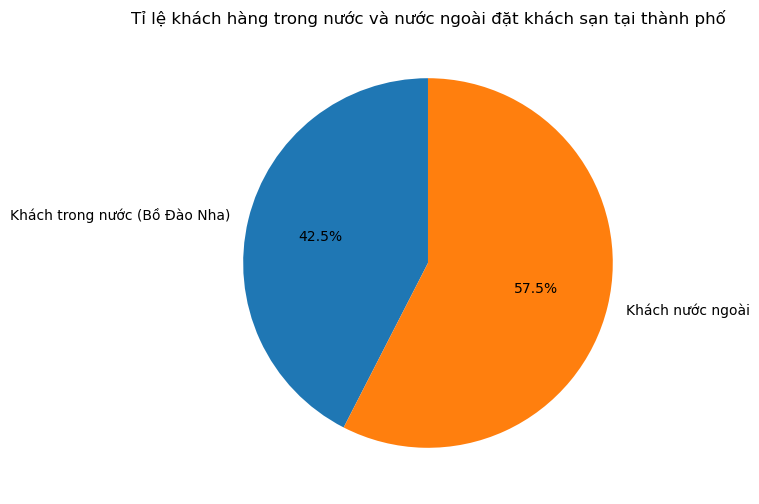

In [121]:
plt.figure(figsize=(10, 6))
plt.pie(
    [internal_percentage, foreign_percentage],
    labels=["Khách trong nước (Bồ Đào Nha)", "Khách nước ngoài"],
    autopct="%1.1f%%",
    startangle=90,
)
plt.title("Tỉ lệ khách hàng trong nước và nước ngoài đặt khách sạn tại thành phố")
plt.show()


**Nhận xét**:
Cân bằng giữa hai loại khách => xu hướng cả 2 loại khách đều thích Resort....
-:
...


### 2. Tỷ lệ khách quốc tế đặt phòng


In [122]:
foreign_nationalities = foreign_customers["country"].value_counts()

foreign_nationalities_percentage = (
    foreign_nationalities / len(foreign_customers)
) * 100

# top 10 highest countries
top_countries = foreign_nationalities_percentage.head(10)

top_countries


GBR    30.615632
ESP    17.981432
IRL    10.103210
FRA     7.390696
DEU     4.771537
CN      3.122245
NLD     2.489497
USA     2.375395
ITA     2.173124
CHE     2.152378
Name: country, dtype: float64

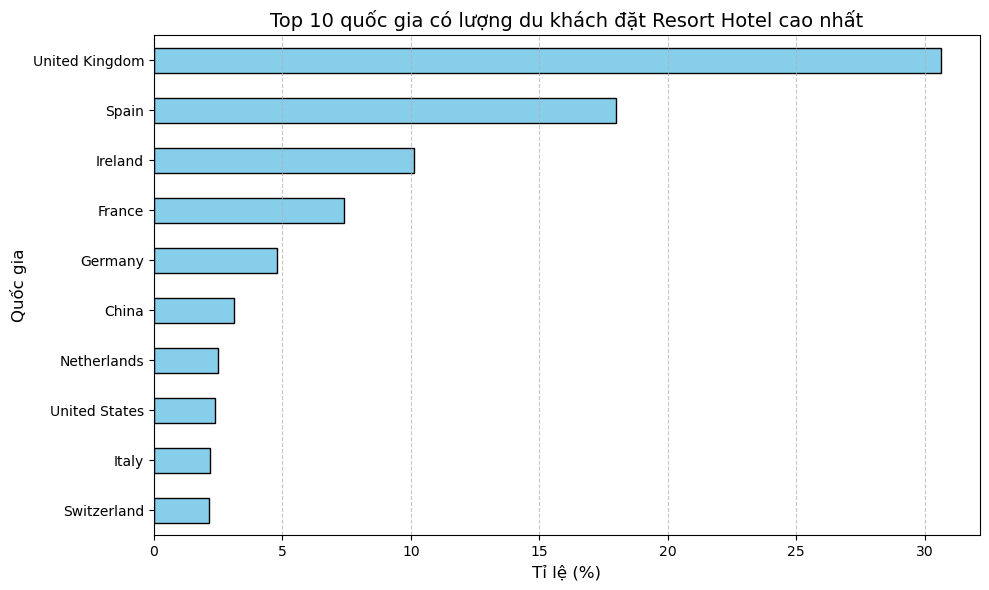

In [123]:
# top 10 countries with highest percentage of foreign customers
plt.figure(figsize=(10, 6))
top_10_countries = top_countries.sort_values(ascending=True).tail(10)
top_10_countries.sort_values().plot(kind="barh", color="skyblue", edgecolor="black")

mapping = {
    "GBR": "United Kingdom",
    "FRA": "France",
    "DEU": "Germany",
    "ESP": "Spain",
    "ITA": "Italy",
    "IRL": "Ireland",
    "BEL": "Belgium",
    "BRA": "Brazil",
    "NLD": "Netherlands",
    "USA": "United States",
    "CHE": "Switzerland",
    "CN": "China",
}
plt.yticks(
    ticks=range(10),
    labels=[mapping.get(country, country) for country in top_10_countries.index],
)

plt.title("Top 10 quốc gia có lượng du khách đặt Resort Hotel cao nhất", fontsize=14)
plt.xlabel("Tỉ lệ (%)", fontsize=12)
plt.ylabel("Quốc gia", fontsize=12)
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.tight_layout()

plt.show()


**Nhận xét**:
Trong top 10 quốc gia đặt phòng thì có CN (quốc gia châu Á), thể hiện loại hình khách sạn Resort được nhiều du khách từ đa dạng châu lục hơn so với City, vì..., đề xuất,...


### 3. Doanh thu phân theo loại khách đặt phòng


In [124]:
# raw number of bookings and percentages
total_bookings = city_hotel_data["customer_type"].value_counts()
percentage_bookings = (total_bookings / total_bookings.sum()) * 100

# total revenue (raw amount) and percentages
total_revenue = city_hotel_data.groupby("customer_type")["revenue"].sum()
percentage_revenue = (total_revenue / total_revenue.sum()) * 100

# all insights into a DataFrame for comparison
detailed_customer_analysis = pd.DataFrame(
    {
        "total_bookings": total_bookings,
        "percentage_bookings": percentage_bookings,
        "total_revenue": total_revenue,
        "percentage_revenue": percentage_revenue,
    }
).sort_values(by="total_revenue", ascending=False)

detailed_customer_analysis


,total_bookings,percentage_bookings,total_revenue,percentage_revenue
Transient,26926,80.354532,12811549.68,82.173843
Transient-Party,4648,13.870900,1560914.42,10.011774
Contract,1668,4.977767,1143182.16,7.332421
Group,267,0.796801,75141.76,0.481963


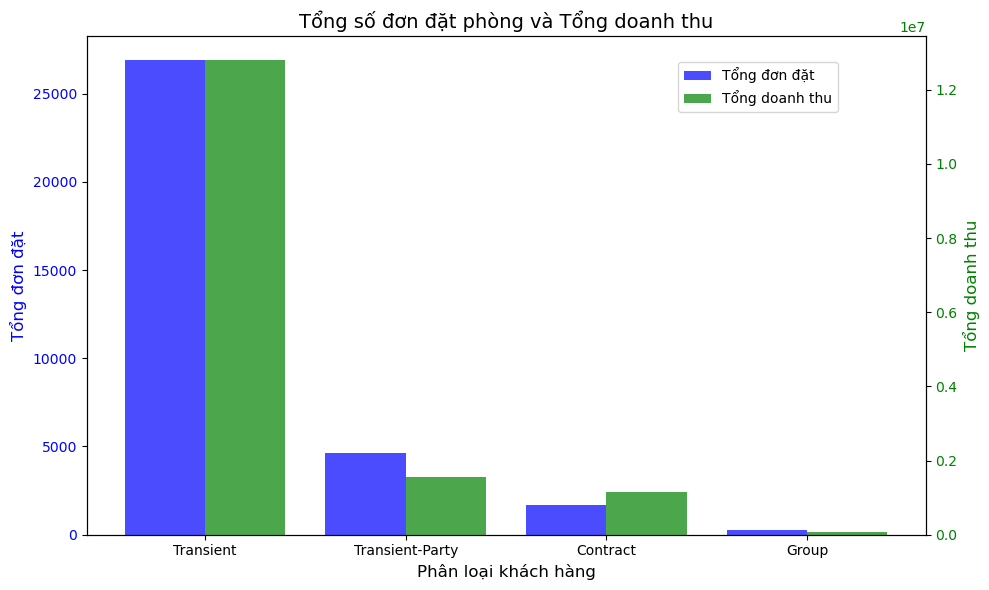

In [125]:
fig, ax1 = plt.subplots(figsize=(10, 6))

x = range(len(detailed_customer_analysis))
bar_width = 0.4
ax1.bar(
    x,
    detailed_customer_analysis["total_bookings"],
    bar_width,
    color="blue",
    alpha=0.7,
    label="Tổng đơn đặt",
)
ax1.set_ylabel("Tổng đơn đặt", color="blue", fontsize=12)
ax1.tick_params(axis="y", labelcolor="blue")

ax2 = ax1.twinx()
ax2.bar(
    [p + bar_width for p in x],
    detailed_customer_analysis["total_revenue"],
    bar_width,
    color="green",
    alpha=0.7,
    label="Tổng doanh thu",
)
ax2.set_ylabel("Tổng doanh thu", color="green", fontsize=12)
ax2.tick_params(axis="y", labelcolor="green")

# Labels, title, and legend
ax1.set_xlabel("Phân loại khách hàng", fontsize=12)
ax1.set_xticks([p + bar_width / 2 for p in x])
ax1.set_xticklabels(detailed_customer_analysis.index)
fig.legend(loc="upper right", bbox_to_anchor=(0.85, 0.9), fontsize=10)
plt.title("Tổng số đơn đặt phòng và Tổng doanh thu", fontsize=14)
plt.tight_layout()
plt.show()


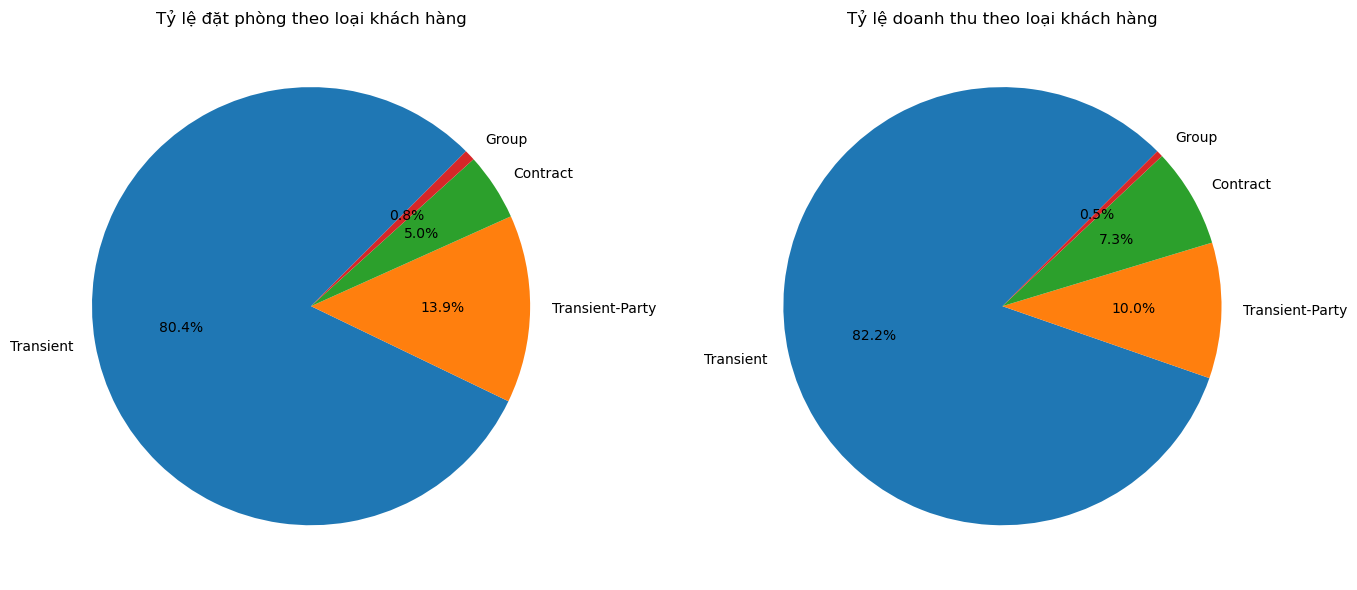

In [126]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

ax[0].pie(
    detailed_customer_analysis["percentage_bookings"],
    labels=detailed_customer_analysis.index,
    autopct="%1.1f%%",
    startangle=45,
)
ax[0].set_title("Tỷ lệ đặt phòng theo loại khách hàng")


ax[1].pie(
    detailed_customer_analysis["percentage_revenue"],
    labels=detailed_customer_analysis.index,
    autopct="%1.1f%%",
    startangle=45,
)
ax[1].set_title("Tỷ lệ doanh thu theo loại khách hàng")

plt.tight_layout()
plt.show()


**Nhận xét**: Khách vãng lai (Transient) tuy chỉ ở thời gian ngắn nhung chiếm số đơn lớn nhất (80.4%), đồng thời đa số doanh thu cũng đến từ nguồn khách này


## II) KHÁCH NỘI ĐỊA HAY QUỐC TẾ CÓ TỈ LỆ HỦY ĐƠN CAO HƠN ?


### Vẽ biểu đồ thể hiện tỉ lệ hủy đơn qua các quý của khách nội địa và khách quốc tế


#### Tính số đơn hủy qua các quý của khách nội địa và khách quốc tế


In [127]:
df["quarter_year"] = df["arrival_date"].dt.to_period("Q")
df["is_domestic"] = df["country"] == "PRT"


df_canceled = df[df["is_canceled"] == 1]

num_canceled_order = (
    df_canceled.groupby(["is_domestic", "quarter_year"]).size().unstack()
)

num_canceled_order


quarter_year,2015Q3,2015Q4,2016Q1,2016Q2,2016Q3,2016Q4,2017Q1,2017Q2,2017Q3
is_domestic,,,,,,,,,
False,20,18,18,167,513,456,377,796,705
True,853,390,460,695,754,356,324,530,542


#### Tính số đơn đã đặt qua các qúy của khách nội địa và khách quốc tế


In [128]:
num_order = df.groupby(["is_domestic", "quarter_year"]).size().unstack()

num_order


quarter_year,2015Q3,2015Q4,2016Q1,2016Q2,2016Q3,2016Q4,2017Q1,2017Q2,2017Q3
is_domestic,,,,,,,,,
False,1797,1488,1521,2411,2566,2519,2118,3178,2129
True,1993,1479,1905,1615,1687,1405,1564,1326,1254


#### Tỉ lệ hủy đơn qua các quý của khách nội địa và khách quốc tế


In [129]:
cancel_ratio = num_canceled_order / num_order * 100

cancel_ratio = cancel_ratio.round(2)

cancel_ratio


quarter_year,2015Q3,2015Q4,2016Q1,2016Q2,2016Q3,2016Q4,2017Q1,2017Q2,2017Q3
is_domestic,,,,,,,,,
False,1.11,1.21,1.18,6.93,19.99,18.10,17.80,25.05,33.11
True,42.80,26.37,24.15,43.03,44.69,25.34,20.72,39.97,43.22


#### Chuyển vị lại bảng


In [130]:
cancel_ratio = cancel_ratio.T

cancel_ratio


is_domestic,False,True
quarter_year,,
2015Q3,1.11,42.80
2015Q4,1.21,26.37
2016Q1,1.18,24.15
2016Q2,6.93,43.03
2016Q3,19.99,44.69
2016Q4,18.10,25.34
2017Q1,17.80,20.72
2017Q2,25.05,39.97
2017Q3,33.11,43.22


#### Đổi tên cột và reset index


In [131]:
cancel_ratio = cancel_ratio.rename(columns={False: "international", True: "domestic"})

cancel_ratio = cancel_ratio.reset_index(names="quarter_year")

cancel_ratio.columns


Index(['quarter_year', 'international', 'domestic'], dtype='object', name='is_domestic')

#### Vẽ biểu đồ


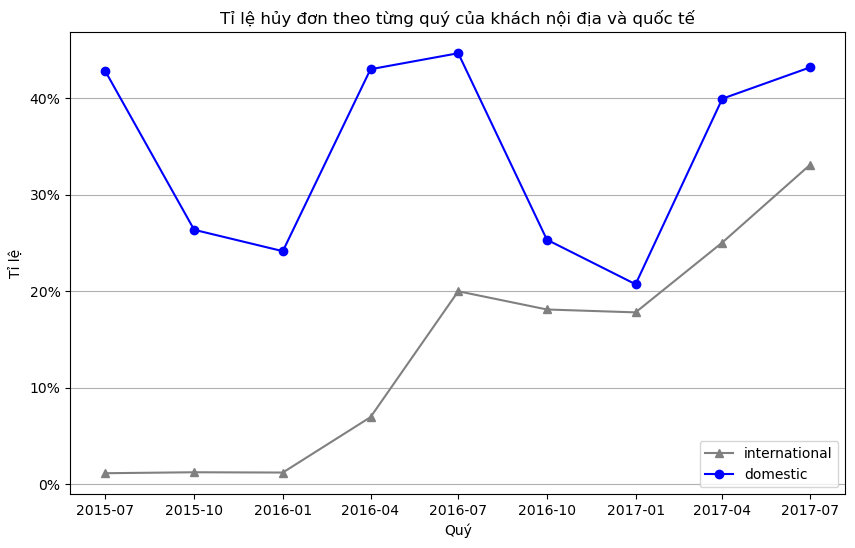

In [132]:
def percent(x, pos):
    return f"{x:.0f}%"


cancel_ratio["quarter_year_tst"] = cancel_ratio["quarter_year"].dt.to_timestamp()


plt.figure(figsize=(10, 6))
plt.plot(
    cancel_ratio["quarter_year_tst"],
    cancel_ratio["international"],
    label="international",
    marker="^",
    color="gray",
)
plt.plot(
    cancel_ratio["quarter_year_tst"],
    cancel_ratio["domestic"],
    label="domestic",
    marker="o",
    color="blue",
)


plt.title("Tỉ lệ hủy đơn theo từng quý của khách nội địa và quốc tế")
plt.grid(axis="y")
plt.ylabel("Tỉ lệ")
plt.xlabel("Quý")
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(percent))
plt.legend()
plt.show()


- Từ biểu đồ nhận thấy tỉ lệ hủy đơn qua các quý của khách nội địa cao hơn nhiều so với khách quốc tế


### Thực hiện kiểm định như sau:

- H0: Trung bình tỉ lệ hủy đơn trong 1 tuần của khách nội địa và quốc tế là như nhau
- H1: Trung bình tỉ lệ hủy đơn trong 1 tuần của khách nội địa lớn hơn khách quốc tế
- alpha = 0.05

- Lí do chọn 1 tuần mà không phải 1 tháng hay quý: để khảo sát ở khoảng thời gian hẹp hơn khi đó có nhiều mẫu để thực hiện kiểm định


#### Tính số đơn hủy qua các tuần của khách nội địa và khách quốc tế


In [133]:
df["week_year"] = df["arrival_date"].dt.to_period("W")

df_canceled = df[df["is_canceled"] == 1]

num_canceled_order = df_canceled.groupby(["is_domestic", "week_year"]).size().unstack()

num_canceled_order = num_canceled_order.fillna(0)

num_canceled_order


week_year,2015-06-29/2015-07-05,2015-07-06/2015-07-12,2015-07-13/2015-07-19,2015-07-20/2015-07-26,2015-07-27/2015-08-02,2015-08-03/2015-08-09,2015-08-10/2015-08-16,2015-08-17/2015-08-23,2015-08-24/2015-08-30,2015-08-31/2015-09-06,...,2017-06-26/2017-07-02,2017-07-03/2017-07-09,2017-07-10/2017-07-16,2017-07-17/2017-07-23,2017-07-24/2017-07-30,2017-07-31/2017-08-06,2017-08-07/2017-08-13,2017-08-14/2017-08-20,2017-08-21/2017-08-27,2017-08-28/2017-09-03
is_domestic,,,,,,,,,,,,,,,,,,,,,
False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,...,74.0,63.0,72.0,69.0,91.0,97.0,72.0,92.0,73.0,45.0
True,48.0,47.0,65.0,67.0,88.0,70.0,93.0,60.0,76.0,72.0,...,66.0,49.0,62.0,64.0,52.0,77.0,52.0,77.0,57.0,26.0


#### Tính số đơn qua các tuần của khách nội địa và khách quốc tế


In [134]:
num_order = df.groupby(["is_domestic", "week_year"]).size().unstack()

num_order = num_order.fillna(0)

num_order


week_year,2015-06-29/2015-07-05,2015-07-06/2015-07-12,2015-07-13/2015-07-19,2015-07-20/2015-07-26,2015-07-27/2015-08-02,2015-08-03/2015-08-09,2015-08-10/2015-08-16,2015-08-17/2015-08-23,2015-08-24/2015-08-30,2015-08-31/2015-09-06,...,2017-06-26/2017-07-02,2017-07-03/2017-07-09,2017-07-10/2017-07-16,2017-07-17/2017-07-23,2017-07-24/2017-07-30,2017-07-31/2017-08-06,2017-08-07/2017-08-13,2017-08-14/2017-08-20,2017-08-21/2017-08-27,2017-08-28/2017-09-03
is_domestic,,,,,,,,,,,,,,,,,,,,,
False,104,121,119,123,135,103,118,104,121,161,...,218,236,256,229,252,252,231,238,222,135
True,114,142,174,164,197,185,215,171,178,152,...,149,102,150,122,120,170,128,187,148,64


#### Tỉ lệ hủy đơn qua các tuần của khách nội địa và khách quốc tế


In [135]:
cancel_ratio = num_canceled_order / num_order * 100

cancel_ratio = cancel_ratio.round(2)

cancel_ratio


week_year,2015-06-29/2015-07-05,2015-07-06/2015-07-12,2015-07-13/2015-07-19,2015-07-20/2015-07-26,2015-07-27/2015-08-02,2015-08-03/2015-08-09,2015-08-10/2015-08-16,2015-08-17/2015-08-23,2015-08-24/2015-08-30,2015-08-31/2015-09-06,...,2017-06-26/2017-07-02,2017-07-03/2017-07-09,2017-07-10/2017-07-16,2017-07-17/2017-07-23,2017-07-24/2017-07-30,2017-07-31/2017-08-06,2017-08-07/2017-08-13,2017-08-14/2017-08-20,2017-08-21/2017-08-27,2017-08-28/2017-09-03
is_domestic,,,,,,,,,,,,,,,,,,,,,
False,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,4.97,...,33.94,26.69,28.12,30.13,36.11,38.49,31.17,38.66,32.88,33.33
True,42.11,33.1,37.36,40.85,44.67,37.84,43.26,35.09,42.7,47.37,...,44.30,48.04,41.33,52.46,43.33,45.29,40.62,41.18,38.51,40.62


#### chuyển vị lại bảng và đặt tên lại các cột


In [136]:
cancel_ratio = cancel_ratio.T

new_columns = {False: "international", True: "domestic"}

cancel_ratio = cancel_ratio.rename(columns=new_columns)

cancel_ratio


is_domestic,international,domestic
week_year,,
2015-06-29/2015-07-05,0.00,42.11
2015-07-06/2015-07-12,0.00,33.10
2015-07-13/2015-07-19,0.00,37.36
2015-07-20/2015-07-26,0.00,40.85
2015-07-27/2015-08-02,0.00,44.67
...,...,...
2017-07-31/2017-08-06,38.49,45.29
2017-08-07/2017-08-13,31.17,40.62
2017-08-14/2017-08-20,38.66,41.18


#### Tính trung bình tỉ lệ hủy đơn trong 1 tuần của khách nội địa và khách quốc tế


In [137]:
mean_by_origin = cancel_ratio.mean()
mean_by_origin


is_domestic
international    12.945439
domestic         34.517807
dtype: float64

#### Tạo hàm tính thống kê kiểm định


In [138]:
def get_statistic(sample_a, sample_b):
    return np.mean(sample_a) - np.mean(sample_b)


#### Thực hiện kiểm định bằng permutation test


In [139]:
p_value = stats.permutation_test(
    (cancel_ratio["domestic"], cancel_ratio["international"]),
    statistic=get_statistic,
    n_resamples=1000000,
    alternative="greater",
).pvalue

p_value


9.99999000001e-07

- Giá trị p_value < 0.05 nên có cơ sở khẳng định trung bình tỉ lệ hủy đơn trong 1 tuần của khách nội địa lớn hơn khách quốc tế

- Từ biểu đồ tỉ lệ hủy đơn theo quý và kết quả kiểm định như trên, có thể khẳng định rằng khách nội địa có xu hướng hủy đơn nhiều hơn so với khách quốc tế

- Ý nghĩa: Việc khách nội địa có xu hướng hủy đơn nhiều hơn chứng tỏ dịch vụ của khách sạn vẫn chưa thực sự tốt, chính vì vậy, khách sạn cần cải thiện chất lượng dịch vụ để đáp ứng với yêu cầu của khách nội địa tốt hơn, vì thị trường nội địa đóng vai trò quan trọng trong sự phát triển của khách sạn.


## III) THỜI ĐIỂM NÀO KHÁCH HÀNG CÓ KHẢ NĂNG ĐẶT PHÒNG NHƯ Ý NHIỀU NHẤT (ƯỚC LƯỢNG THÁNG ĐỘ TIN CẬY 95%)


### Tính số đơn như ý theo từng tháng


In [140]:
df["month"] = df["arrival_date"].dt.month

df_assign_like_order = df[df["assigned_room_type"] == df["reserved_room_type"]]

num_order_assign_like_order_by_month = (
    df_assign_like_order["month"].value_counts().sort_index()
)

num_order_assign_like_order_by_month


1     1191
2     1731
3     1968
4     2260
5     2372
6     2416
7     3824
8     4197
9     1983
10    2078
11    1405
12    1518
Name: month, dtype: int64

### Tính số đơn theo từng tháng


In [141]:
num_order_by_month = df["month"].value_counts().sort_index()

num_order_by_month


1     1961
2     2491
3     2656
4     2828
5     2942
6     2760
7     4312
8     4664
9     2450
10    2726
11    2050
12    2115
Name: month, dtype: int64

### Tỉ lệ phần trăm đơn đặt được như ý theo từng tháng


In [142]:
percent_num_order_assign_like_order_by_month = (
    num_order_assign_like_order_by_month / num_order_by_month * 100
)
percent_num_order_assign_like_order_by_month = (
    percent_num_order_assign_like_order_by_month.round(2)
)


percent_num_order_assign_like_order_by_month


1     60.73
2     69.49
3     74.10
4     79.92
5     80.63
6     87.54
7     88.68
8     89.99
9     80.94
10    76.23
11    68.54
12    71.77
Name: month, dtype: float64

### Gộp lại thành bảng


In [143]:
num_order_assign_like_order_by_month = num_order_assign_like_order_by_month.to_frame(
    name="num_order_assign_like_order"
)
num_order_by_month = num_order_by_month.to_frame(name="num_order")
percent_num_order_assign_like_order_by_month = (
    percent_num_order_assign_like_order_by_month.to_frame(name="percent")
)

table = pd.concat(
    [
        num_order_assign_like_order_by_month,
        num_order_by_month,
        percent_num_order_assign_like_order_by_month,
    ],
    axis=1,
)

table


,num_order_assign_like_order,num_order,percent
1,1191,1961,60.73
2,1731,2491,69.49
3,1968,2656,74.10
4,2260,2828,79.92
5,2372,2942,80.63
6,2416,2760,87.54
7,3824,4312,88.68
8,4197,4664,89.99
9,1983,2450,80.94
10,2078,2726,76.23


### Tìm khoảng tin cậy cho tỉ lệ đơn như ý theo từng tháng


#### Tìm số đơn đặt không như ý theo từng tháng


In [144]:
table["num_order_assign_not_like_order"] = (
    table["num_order"] - table["num_order_assign_like_order"]
)


#### Tạo danh sách gồm 2 số 1 và 0, 1: như ý và 0: không như ý


In [145]:
# 1: đơn được như ý và 0: là không như ý
list_1_by_month = table["num_order_assign_like_order"].apply(lambda x: [1] * x)
list_0_by_month = table["num_order_assign_not_like_order"].apply(lambda x: [0] * x)

list_1_and_0_by_month = list_1_by_month + list_0_by_month

list_1_and_0_by_month


1     [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...
2     [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...
3     [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...
4     [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...
5     [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...
6     [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...
7     [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...
8     [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...
9     [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...
10    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...
11    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...
12    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...
dtype: object

#### Thực hiện ước lượng khoảng tin cậy cho tỉ lệ đặt đơn như ý trong từng tháng


In [146]:
def get_ci_for_ratio(sample):
    res = stats.bootstrap(
        (sample,), np.mean, confidence_level=0.95, n_resamples=100000
    ).confidence_interval

    res = [round(item * 100, 2) for item in res]

    return res


ci_for_ratio_by_month = list_1_and_0_by_month.apply(lambda x: get_ci_for_ratio(x))

ci_for_ratio_by_month


1     [58.54, 62.88]
2     [67.64, 71.26]
3      [72.4, 75.75]
4     [78.43, 81.36]
5     [79.16, 82.02]
6     [86.27, 88.73]
7     [87.71, 89.61]
8     [89.11, 90.82]
9     [79.35, 82.45]
10    [74.61, 77.81]
11    [66.49, 70.49]
12    [69.83, 73.66]
dtype: object

#### Tổng hợp vào trong bảng


In [147]:
table["lower_ratio_bound"] = ci_for_ratio_by_month.apply(lambda x: x[0])
table["upper_ratio_bound"] = ci_for_ratio_by_month.apply(lambda x: x[1])

table


,num_order_assign_like_order,num_order,percent,num_order_assign_not_like_order,lower_ratio_bound,upper_ratio_bound
1,1191,1961,60.73,770,58.54,62.88
2,1731,2491,69.49,760,67.64,71.26
3,1968,2656,74.10,688,72.40,75.75
4,2260,2828,79.92,568,78.43,81.36
5,2372,2942,80.63,570,79.16,82.02
6,2416,2760,87.54,344,86.27,88.73
7,3824,4312,88.68,488,87.71,89.61
8,4197,4664,89.99,467,89.11,90.82
9,1983,2450,80.94,467,79.35,82.45
10,2078,2726,76.23,648,74.61,77.81


### Vẽ biểu đồ minh họa cho khoảng tin cậy 95% tỉ lệ đặt đơn như ý theo từng tháng và biểu đồ số đơn đặt theo từng tháng


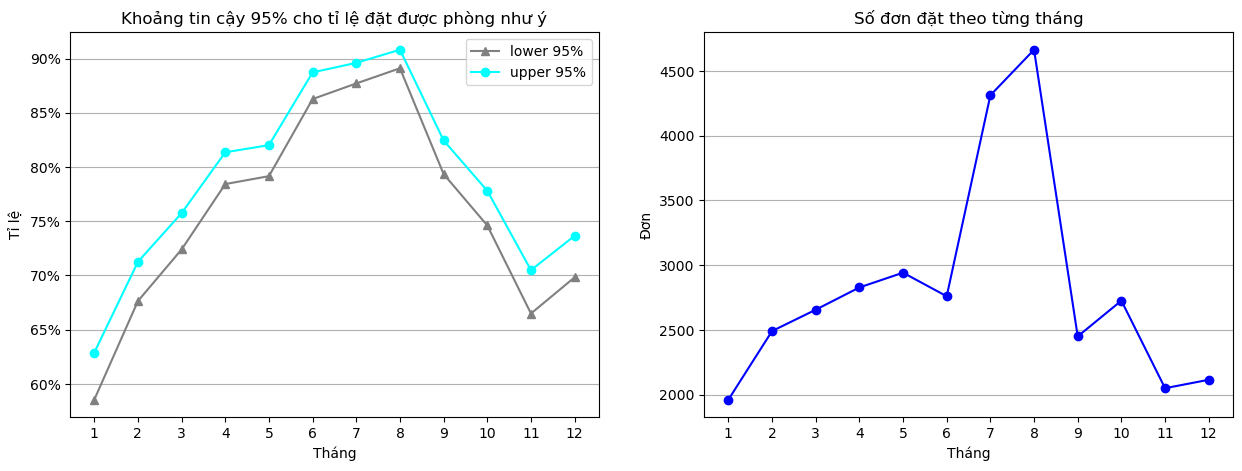

In [148]:
def percent(x, pos):
    return f"{x:.0f}%"


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# Vẽ biểu đồ khoảng tin cậy cho tỉ lệ
ax = axes[0]
ax.plot(
    table.index, table["lower_ratio_bound"], marker="^", label="lower 95%", color="grey"
)
ax.plot(
    table.index, table["upper_ratio_bound"], marker="o", label="upper 95%", color="cyan"
)


ax.set_xticks(table.index)
ax.set_xlabel("Tháng")
ax.set_ylabel("Tỉ lệ")
ax.set_title("Khoảng tin cậy 95% cho tỉ lệ đặt được phòng như ý")
ax.legend()
ax.grid(axis="y")

ax.yaxis.set_major_formatter(ticker.FuncFormatter(percent))

# Vẽ biểu đồ số đơn đặt theo từng tháng
ax = axes[1]
ax.plot(table.index, table["num_order"], marker="o", color="blue")

ax.set_xticks(table.index)
ax.set_xlabel("Tháng")
ax.set_ylabel("Đơn")
ax.set_title("Số đơn đặt theo từng tháng")
ax.grid(axis="y")

plt.show()


- Từ biểu đồ, ta thấy khả năng đặt được phòng như ý từ tháng 5 đến tháng 9 trên 80%, khá cao, còn đối với khoảng thời gian đầu năm và cuối năm khả năng đặt được phòng nhỏ hơn 75%, điều này chứng tỏ với vai trò là khách hàng, nên xem xét việc đặt khách sạn ở khoảng thời gian tháng 5 đến tháng 9 để việc đặt phòng được như ý, qua đó tăng tính trải nghiệm cho chuyến đi

- Với vai trò là khách sạn, cần tìm hiểu nguyên nhân tại sao ở thời điểm đầu năm hay cuối năm, số đơn đặt phòng ít nhưng tỉ lệ đặt phòng như ý là thấp hơn so với khoảng thời gian tháng 7, 8 khi đó số đơn đặt nhiều hơn nhưng tỉ lệ đặt phòng như ý lại cao. Qua đó khách sạn cần cải thiện chất lượng phục vụ khách hàng, tăng tỉ lệ đặt phòng như ý nhằm đảm bảo sự hài lòng của khách hàng ở mức cao nhất


## IV) KHÁCH HÀNG THÍCH ĐẾN VÀO NGÀY TRONG TUẦN HAY CUỐI TUẦN ?


### Tạo cột is_weekend: Ngày đến có phải là vào cuối tuần


In [149]:
df["week_day"] = df["arrival_date"].dt.weekday

df["is_weekend"] = df["week_day"].isin([5, 6]).astype("int")

df["is_weekend"]


0        0
1        0
2        0
3        0
4        0
        ..
33950    0
33951    0
33952    0
33953    0
33954    0
Name: is_weekend, Length: 33955, dtype: int32

### Tính số đơn đặt theo từng tuần


In [150]:
df["week_year"] = df["arrival_date"].dt.to_period("W")

num_order_by_week = df["week_year"].value_counts().sort_index()
num_order_by_week


2015-06-29/2015-07-05    218
2015-07-06/2015-07-12    263
2015-07-13/2015-07-19    293
2015-07-20/2015-07-26    287
2015-07-27/2015-08-02    332
                        ... 
2017-07-31/2017-08-06    422
2017-08-07/2017-08-13    359
2017-08-14/2017-08-20    425
2017-08-21/2017-08-27    370
2017-08-28/2017-09-03    199
Freq: W-SUN, Name: week_year, Length: 114, dtype: int64

### Chuyển thành bảng


In [151]:
num_order_by_week = num_order_by_week.to_frame(name="count").reset_index(names="week")

num_order_by_week


,week,count
0,2015-06-29/2015-07-05,218
1,2015-07-06/2015-07-12,263
2,2015-07-13/2015-07-19,293
3,2015-07-20/2015-07-26,287
4,2015-07-27/2015-08-02,332
...,...,...
109,2017-07-31/2017-08-06,422
110,2017-08-07/2017-08-13,359
111,2017-08-14/2017-08-20,425
112,2017-08-21/2017-08-27,370


### Tính số đơn đặt vào cuối tuần theo từng tuần


In [152]:
df_weekend = df[df["is_weekend"] == 1]

num_weekend_order_by_week = df_weekend["week_year"].value_counts().sort_index()
num_weekend_order_by_week


2015-06-29/2015-07-05     94
2015-07-06/2015-07-12     86
2015-07-13/2015-07-19     83
2015-07-20/2015-07-26     88
2015-07-27/2015-08-02    114
                        ... 
2017-07-24/2017-07-30    115
2017-07-31/2017-08-06    137
2017-08-07/2017-08-13    110
2017-08-14/2017-08-20    122
2017-08-21/2017-08-27    123
Freq: W-SUN, Name: week_year, Length: 113, dtype: int64

### Chuyển thành bảng


In [153]:
num_weekend_order_by_week = num_weekend_order_by_week.to_frame(
    name="count"
).reset_index(names="week")

num_weekend_order_by_week


,week,count
0,2015-06-29/2015-07-05,94
1,2015-07-06/2015-07-12,86
2,2015-07-13/2015-07-19,83
3,2015-07-20/2015-07-26,88
4,2015-07-27/2015-08-02,114
...,...,...
108,2017-07-24/2017-07-30,115
109,2017-07-31/2017-08-06,137
110,2017-08-07/2017-08-13,110
111,2017-08-14/2017-08-20,122


### Gộp lại thành 1 bảng


In [154]:
num_weekend_order_by_week = num_weekend_order_by_week.rename(
    columns={"count": "weekend_count"}
)

table_by_week = pd.merge(
    num_order_by_week, num_weekend_order_by_week, on="week", how="left"
)

table_by_week


,week,count,weekend_count
0,2015-06-29/2015-07-05,218,94.0
1,2015-07-06/2015-07-12,263,86.0
2,2015-07-13/2015-07-19,293,83.0
3,2015-07-20/2015-07-26,287,88.0
4,2015-07-27/2015-08-02,332,114.0
...,...,...,...
109,2017-07-31/2017-08-06,422,137.0
110,2017-08-07/2017-08-13,359,110.0
111,2017-08-14/2017-08-20,425,122.0
112,2017-08-21/2017-08-27,370,123.0


### Lấp các giá trị nan trong cột weekend_count bằng 0


In [155]:
table_by_week["weekend_count"] = table_by_week["weekend_count"].fillna(0)


### Tính cột tỉ lệ phần trăm


In [156]:
table_by_week["percent"] = table_by_week["weekend_count"] / table_by_week["count"] * 100
table_by_week["percent"] = table_by_week["percent"].round(2)

table_by_week


,week,count,weekend_count,percent
0,2015-06-29/2015-07-05,218,94.0,43.12
1,2015-07-06/2015-07-12,263,86.0,32.70
2,2015-07-13/2015-07-19,293,83.0,28.33
3,2015-07-20/2015-07-26,287,88.0,30.66
4,2015-07-27/2015-08-02,332,114.0,34.34
...,...,...,...,...
109,2017-07-31/2017-08-06,422,137.0,32.46
110,2017-08-07/2017-08-13,359,110.0,30.64
111,2017-08-14/2017-08-20,425,122.0,28.71
112,2017-08-21/2017-08-27,370,123.0,33.24


### Ước lượng khoảng tin cậy cho trung bình tỉ lệ phần trăm đơn được đặt vào cuối tuần trong 1 tuần


In [157]:
ci = stats.bootstrap(
    (table_by_week["percent"],),
    np.mean,
    confidence_level=0.95,
    n_resamples=1000000,
    method="percentile",
).confidence_interval

ci = [round(item, 2) for item in ci]

ci


[28.26, 30.59]

- Ý nghĩa: Như vậy khoảng tin cậy cho tỉ lệ phần trăm đơn được đặt vào cuối tuần trong 1 tuần là 28.26% đến 30.59% hoàn toàn nhỏ hơn 50%, từ đó kết luận khách hàng có xu hướng đặt đơn vào ngày trong tuần từ thứ Hai đến thứ Sáu, điều này giúp khách sạn có thể phân bổ nguồn lực hợp lí hơn, tập trung nhiều hơn vào các ngày trong tuần để phục vụ khách hàng tốt hơn, qua đó tăng sự thỏa mãn của khách hàng đối với dịch vụ của khách sạn.


## V) KÊNH PHÂN PHỐI NÀO ĐÓNG GÓP DOANH THU NHIỀU NHẤT (TÍNH THEO TỪNG THÁNG, VẼ BIỂU ĐỒ MIỀN)


### Tính lợi nhuận của từng kênh phân phối theo từng tháng


In [158]:
df_defined_not_canceled = df[
    (df["distribution_channel"] != "Undefined") & (df["is_canceled"] == 0)
]
df_defined_not_canceled["month"] = df_defined_not_canceled["arrival_date"].dt.month

revenue_by_month = (
    df_defined_not_canceled.groupby(["month", "distribution_channel"])["revenue"]
    .sum()
    .unstack()
)

revenue_by_month = revenue_by_month.fillna(0)

revenue_by_month


distribution_channel,Corporate,Direct,TA/TO
month,,,
1,11829.60,56783.04,157339.02
2,19604.72,70701.18,252461.85
3,26560.79,99858.92,330536.51
4,24645.24,137751.67,471166.71
5,11578.42,142138.87,604178.49
6,8502.15,209806.12,851240.69
7,17759.66,563333.15,1754650.94
8,6020.35,767720.06,2095306.85
9,11423.29,181668.60,722078.27


### Tính tỉ lệ phần trăm lợi nhuận của từng kênh phân phối theo từng tháng


In [159]:
revenue_by_month_pct = (
    revenue_by_month.divide(revenue_by_month.sum(axis=1), axis=0) * 100
)
revenue_by_month_pct


distribution_channel,Corporate,Direct,TA/TO
month,,,
1,5.235456,25.130614,69.633930
2,5.719535,20.626555,73.653910
3,5.812546,21.853061,72.334393
4,3.889939,21.742358,74.367703
5,1.527706,18.754408,79.717885
6,0.794929,19.616318,79.588754
7,0.760343,24.117935,75.121723
8,0.209838,26.758711,73.031451
9,1.248215,19.850800,78.900985


### Vẽ biểu đồ


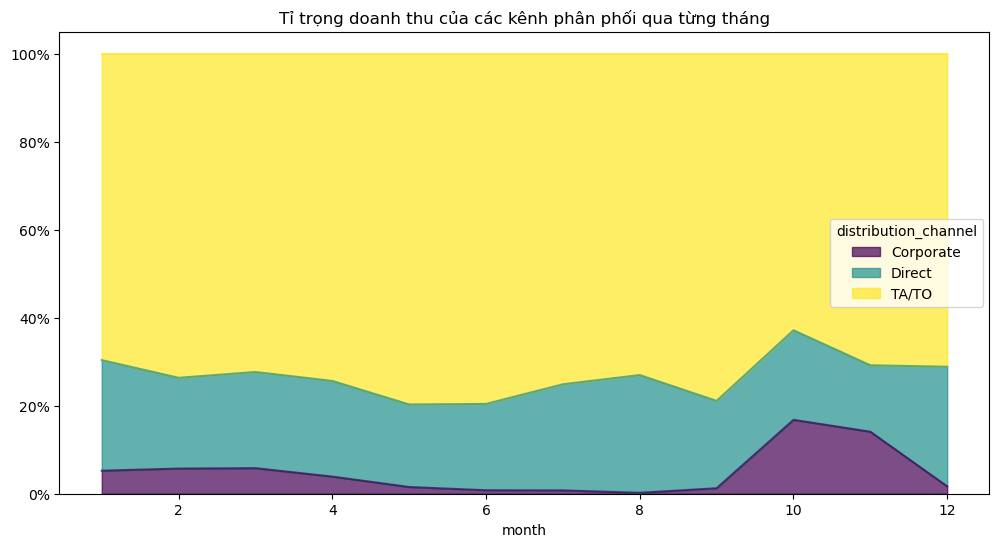

In [160]:
revenue_by_month_pct.plot(
    kind="area", stacked=True, figsize=(12, 6), colormap="viridis", alpha=0.7
)
plt.title("Tỉ trọng doanh thu của các kênh phân phối qua từng tháng")
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(percent))

plt.show()


- Từ biểu đồ, ta kết luận được kênh phân phối TA/TO đóng góp phần lớn tỉ trọng vào doanh thu của khách sạn, như vậy khách sạn cần tập trung đầu tư vào kênh này để thu hút được nhiều khách hàng hơn


## VI) SO SÁNH TỈ LỆ HỦY ĐƠN GIỮA KHÁCH HÀNG CÓ TIỀN SỬ HỦY ĐƠN VÀ KHÔNG CÓ


### Tạo thống kê cho khách hàng có tiền sử hủy đơn và không có


In [161]:
df["did_cancel"] = (df["previous_cancellations"] > 0).astype("int")

num_order = df.groupby(["is_canceled", "did_cancel"]).size().unstack()

num_order


did_cancel,0,1
is_canceled,,
0,25810,171
1,7638,336


### Tính tỉ lệ hủy đơn giữa khách hàng có tiền sử hủy đơn và không có


In [162]:
num_order_t = num_order.T.copy()

num_order_t["percent"] = num_order_t[1] / (num_order_t[0] + num_order_t[1]) * 100
num_order_t = num_order_t["percent"]
num_order_t


did_cancel
0    22.835446
1    66.272189
Name: percent, dtype: float64

### Thực hiện kiểm định:

- H0: tỉ lệ hủy đơn giữa khách hàng có tiền sử hủy đơn = không có
- H1: tỉ lệ hủy đơn giữa khách hàng có tiền sử hủy đơn > không có


In [163]:
def get_statistic(x, y):
    return np.mean(x) - np.mean(y)


list_10_did_cancel_in_past = [1] * num_order.loc[1, 1] + [0] * num_order.loc[0, 1]
list_10_not_did_cancel_in_past = [1] * num_order.loc[1, 0] + [0] * num_order.loc[0, 0]

p_value = 0

for i in range(10):
    result = stats.permutation_test(
        (list_10_did_cancel_in_past, list_10_not_did_cancel_in_past),
        statistic=get_statistic,
        n_resamples=10000,
        alternative="greater",
    ).pvalue

    p_value += result

p_value = p_value / 10
p_value


9.99900009999e-05

- Ý nghĩa: p_value nhỏ hơn alpha nên có cơ sở khằng định tỉ lệ hủy đơn giữa khách hàng có tiền sử hủy đơn lớn hơn khách hàng không có, như vậy khách sạn cần tập trung cải tiến chất lượng phục vụ của mình, xem xét những điểm yếu cần khắc phục để tránh tình trạng khách hàng có tiền sử hủy đơn trước đây vẫn tiếp tục hủy đơn, gây ảnh hưởng đến danh tiếng và doanh thu của khách sạn.


# Phân tích dữ liệu của khách sạn `City Hotel`


## Đọc dữ liệu


In [164]:
df = hotel_original_data[hotel_original_data["hotel"] == "City Hotel"]


## Chuyển đổi kiểu dữ liệu có yếu tố thời gian thành `datetime`


In [165]:
def change_df(df):
    format_year = "%Y-%m-%d"

    df["arrival_date"] = pd.to_datetime(df["arrival_date"], format=format_year)
    df["reservation_status_date"] = pd.to_datetime(
        df["reservation_status_date"], format=format_year
    )


change_df(df)


## I TỔNG QUAN VỀ TÌNH HÌNH ĐẶT PHÒNG KHÁCH SẠN LOẠI "CITY"


### 1. Tỷ lệ đặt phòng chia theo khách nội địa và quốc tế


In [166]:
hotel_data = df
city_hotel_data = hotel_data

internal_customers = city_hotel_data[city_hotel_data["country"] == "PRT"]
foreign_customers = city_hotel_data[city_hotel_data["country"] != "PRT"]

total_customers = len(city_hotel_data)
internal_percentage = len(internal_customers) / total_customers * 100
foreign_percentage = len(foreign_customers) / total_customers * 100

internal_percentage, foreign_percentage


(24.729451413592958, 75.27054858640703)

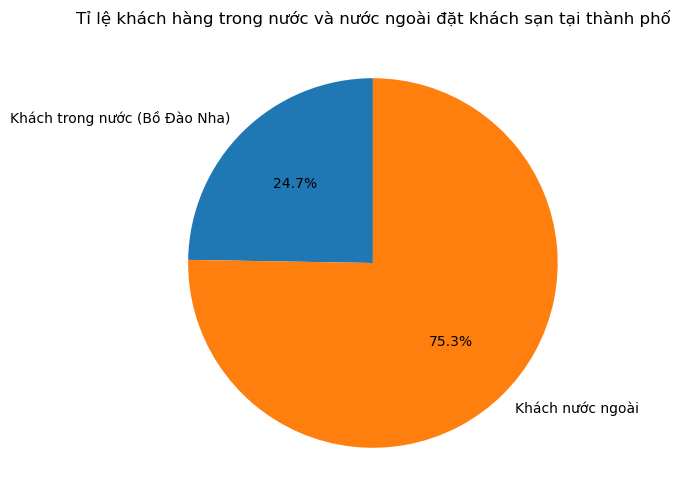

In [167]:
plt.figure(figsize=(10, 6))
plt.pie(
    [internal_percentage, foreign_percentage],
    labels=["Khách trong nước (Bồ Đào Nha)", "Khách nước ngoài"],
    autopct="%1.1f%%",
    startangle=90,
)
plt.title("Tỉ lệ khách hàng trong nước và nước ngoài đặt khách sạn tại thành phố")
plt.show()


**Nhận xét**:

- Tỉ lệ khách nước ngoài đặt khách sạn loại City chiếm số lượng lớn hơn đáng kể so với khách nội địa (gấp khoảng 3 lần).
- Nguyên nhân: khách nước ngoài yêu thích lựa chọn City Hotel vì địa điểm thuận tiện để đi khám phá các địa điểm trong thành phố. Còn với khách nội địa, họ thường chọn các loại khách sạn khác như Resort để trải nghiệm những nơi mới vì họ vốn dĩ đã ở trong thành phố.
- Chiến lược cho các khách sạn City:


### 2. Tỷ lệ khách quốc tế đặt phòng


In [168]:
foreign_nationalities = foreign_customers["country"].value_counts()

foreign_nationalities_percentage = (
    foreign_nationalities / len(foreign_customers)
) * 100

# top 10 highest countries
top_countries = foreign_nationalities_percentage.head(10)

top_countries


FRA    18.436894
GBR    11.260634
DEU    11.106413
ESP     9.409980
ITA     6.581762
BEL     4.203771
BRA     3.947565
NLD     3.559524
USA     3.524700
CHE     2.872991
Name: country, dtype: float64

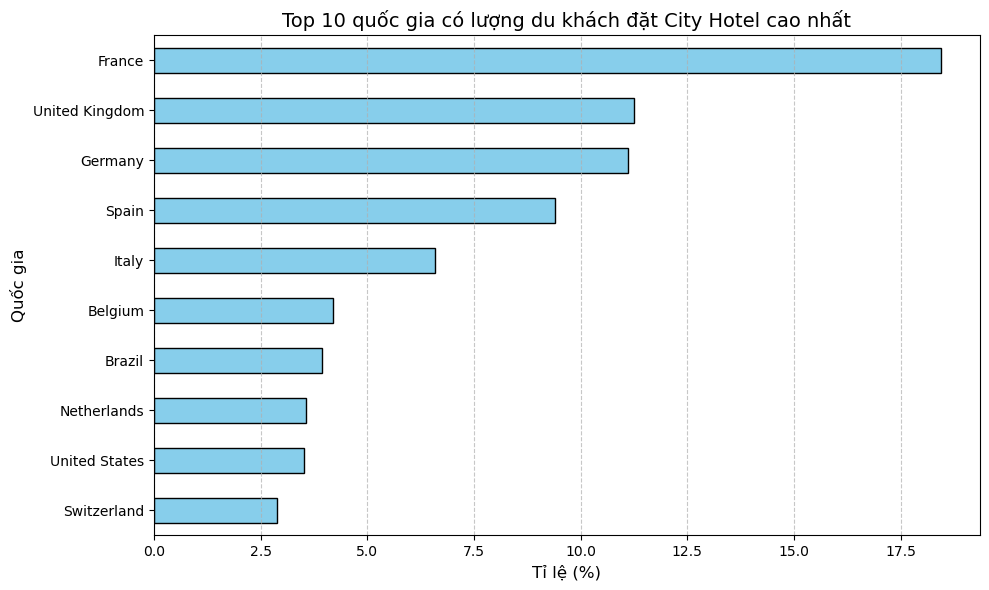

In [169]:
# top 10 countries with highest percentage of foreign customers
plt.figure(figsize=(10, 6))
top_10_countries = top_countries.sort_values(ascending=True).tail(10)
top_10_countries.sort_values().plot(kind="barh", color="skyblue", edgecolor="black")

mapping = {
    "GBR": "United Kingdom",
    "FRA": "France",
    "DEU": "Germany",
    "ESP": "Spain",
    "ITA": "Italy",
    "IRL": "Ireland",
    "BEL": "Belgium",
    "BRA": "Brazil",
    "NLD": "Netherlands",
    "USA": "United States",
    "CHE": "Switzerland",
}
plt.yticks(
    ticks=range(10),
    labels=[mapping.get(country, country) for country in top_10_countries.index],
)

plt.title("Top 10 quốc gia có lượng du khách đặt City Hotel cao nhất", fontsize=14)
plt.xlabel("Tỉ lệ (%)", fontsize=12)
plt.ylabel("Quốc gia", fontsize=12)
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.tight_layout()

plt.show()


**Nhận xét**:


### 3. Doanh thu phân theo loại khách đặt phòng


In [170]:
# raw number of bookings and percentages
total_bookings = city_hotel_data["customer_type"].value_counts()
percentage_bookings = (total_bookings / total_bookings.sum()) * 100

# total revenue (raw amount) and percentages
total_revenue = city_hotel_data.groupby("customer_type")["revenue"].sum()
percentage_revenue = (total_revenue / total_revenue.sum()) * 100

# all insights into a DataFrame for comparison
detailed_customer_analysis = pd.DataFrame(
    {
        "Tổng số đơn đặt": total_bookings,
        "Tỷ lệ đơn đặt": percentage_bookings,
        "total_revenue": total_revenue,
        "Tỷ lệ revenue": percentage_revenue,
    }
).sort_values(by="total_revenue", ascending=False)

detailed_customer_analysis


,Tổng số đơn đặt,Tỷ lệ đơn đặt,total_revenue,Tỷ lệ revenue
Transient,44632,83.564875,16345715.38,87.087000
Transient-Party,7036,13.173563,1864524.75,9.933849
Contract,1471,2.754166,498664.66,2.656795
Group,271,0.507396,60504.50,0.322357


**Nhận xét**: số lượng đơn đặt hàng nhiều cũng góp phần tăng trưởng doanh thu....


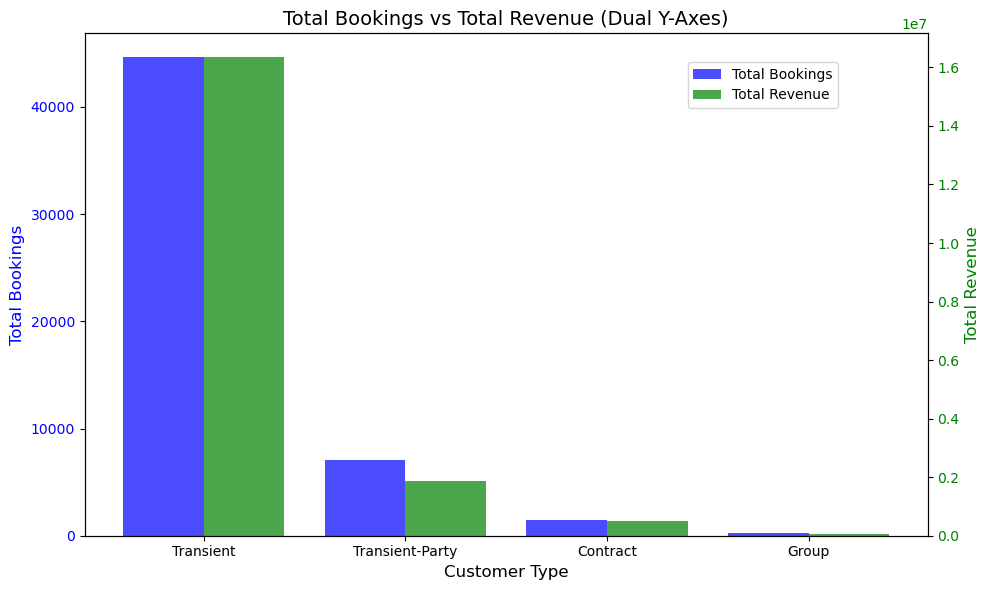

In [171]:
fig, ax1 = plt.subplots(figsize=(10, 6))

x = range(len(detailed_customer_analysis))
bar_width = 0.4
ax1.bar(
    x,
    detailed_customer_analysis["Tổng số đơn đặt"],
    bar_width,
    color="blue",
    alpha=0.7,
    label="Total Bookings",
)
ax1.set_ylabel("Total Bookings", color="blue", fontsize=12)
ax1.tick_params(axis="y", labelcolor="blue")

ax2 = ax1.twinx()
ax2.bar(
    [p + bar_width for p in x],
    detailed_customer_analysis["total_revenue"],
    bar_width,
    color="green",
    alpha=0.7,
    label="Total Revenue",
)
ax2.set_ylabel("Total Revenue", color="green", fontsize=12)
ax2.tick_params(axis="y", labelcolor="green")

ax1.set_xlabel("Customer Type", fontsize=12)
ax1.set_xticks([p + bar_width / 2 for p in x])
ax1.set_xticklabels(detailed_customer_analysis.index)
fig.legend(loc="upper right", bbox_to_anchor=(0.85, 0.9), fontsize=10)
plt.title("Total Bookings vs Total Revenue (Dual Y-Axes)", fontsize=14)
plt.tight_layout()
plt.show()


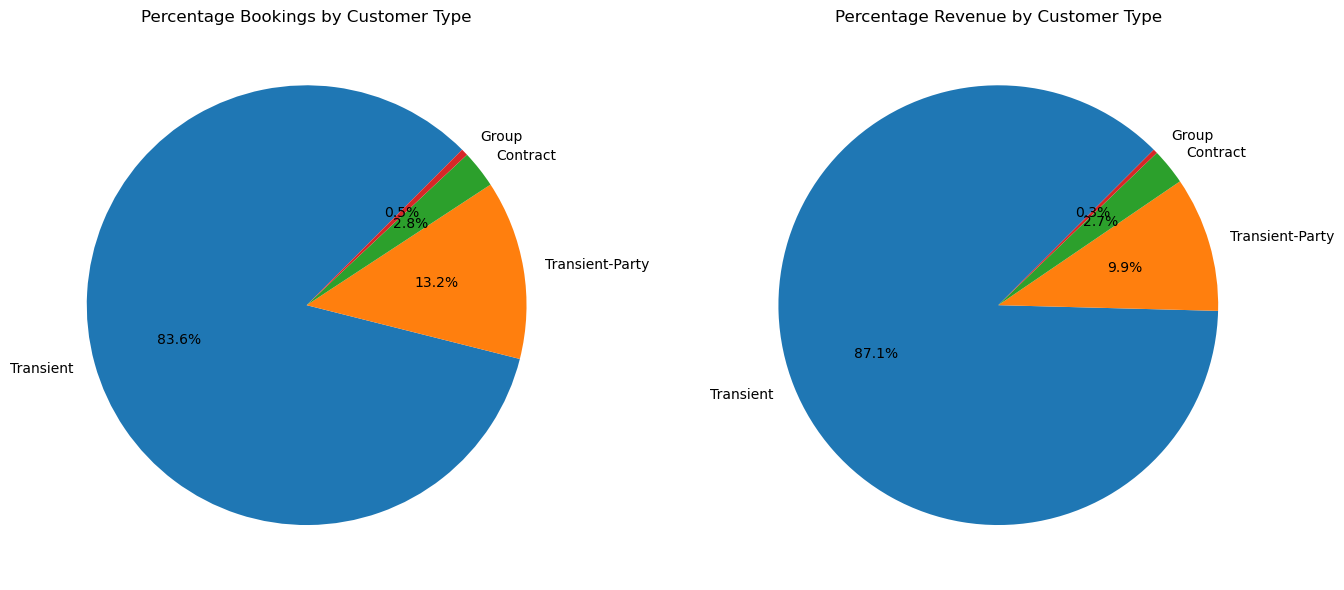

In [172]:
# draw pie chart for percentage of bookings and revenue
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

ax[0].pie(
    detailed_customer_analysis["Tỷ lệ đơn đặt"],
    labels=detailed_customer_analysis.index,
    autopct="%1.1f%%",
    startangle=45,
)
ax[0].set_title("Percentage Bookings by Customer Type")


ax[1].pie(
    detailed_customer_analysis["Tỷ lệ revenue"],
    labels=detailed_customer_analysis.index,
    autopct="%1.1f%%",
    startangle=45,
)
ax[1].set_title("Percentage Revenue by Customer Type")

plt.tight_layout()
plt.show()


### 4. Thời điểm có lượng khách đến khách sạn đông nhất


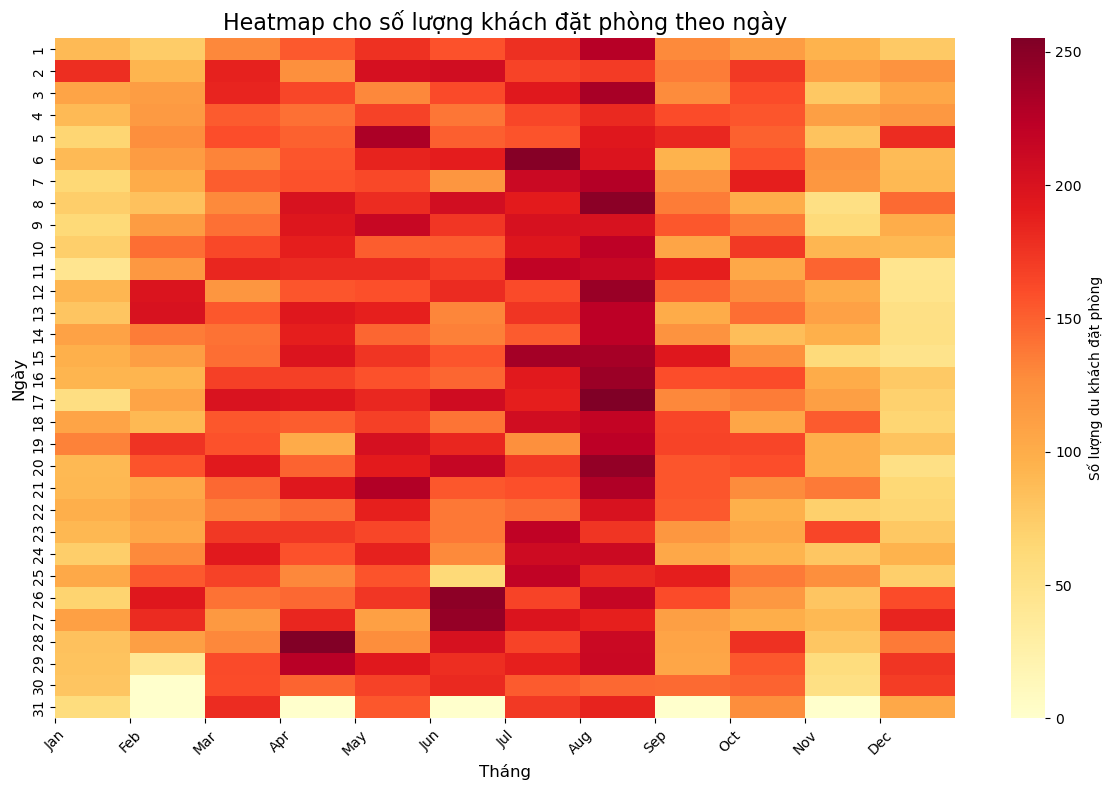

In [173]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter only City Hotel data
data = df
# Filter only City Hotel data
city_hotel_data = data[data["hotel"] == "City Hotel"]

# Convert 'arrival_date' to datetime
city_hotel_data["arrival_date"] = pd.to_datetime(city_hotel_data["arrival_date"])

# Extract month and day
city_hotel_data["arrival_month"] = city_hotel_data["arrival_date"].dt.month
city_hotel_data["arrival_day"] = city_hotel_data["arrival_date"].dt.day

# Group by month and day to calculate the number of visitors
heatmap_data = (
    city_hotel_data.groupby(["arrival_month", "arrival_day"])
    .size()
    .reset_index(name="visitor_count")
)

# Create a pivot table for heatmap
heatmap_pivot = heatmap_data.pivot_table(
    index="arrival_day", columns="arrival_month", values="visitor_count", fill_value=0
)

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    heatmap_pivot,
    cmap="YlOrRd",
    annot=False,
    cbar_kws={"label": "Số lượng du khách đặt phòng"},
)
plt.title("Heatmap cho số lượng khách đặt phòng theo ngày", fontsize=16)
plt.xlabel("Tháng", fontsize=12)
plt.ylabel("Ngày", fontsize=12)
plt.xticks(
    ticks=range(12),
    labels=[
        "Jan",
        "Feb",
        "Mar",
        "Apr",
        "May",
        "Jun",
        "Jul",
        "Aug",
        "Sep",
        "Oct",
        "Nov",
        "Dec",
    ],
    rotation=45,
)
plt.tight_layout()
plt.show()


**Nhận xét**:
Thời điểm tháng 8 và tháng 7 khách hàng ưa đến nhất và cũng là thời điểm tỉ lệ hủy đơn nhìn chung cao hơn với các tháng khác

Ý nghĩa: Thời điểm thích hợp để đến khách sạn nên cân nhắc tránh tháng 8 và tháng 7 vì đó là thời điểm khách sạn khá đông khách nên chất lượng có thể bị giảm đi nhiều so với khi ít khách

- Lý do
- Đề xuất


## II) KHÁCH NỘI ĐỊA HAY KHÁCH QUỐC TẾ CÓ TỈ LỆ HỦY ĐƠN CAO HƠN ?


### Vẽ biểu đồ thể hiện tỉ lệ hủy đơn qua các quý của khách nội địa và khách quốc tế


#### Tính số đơn hủy qua các quý của khách nội địa và khách quốc tế


In [174]:
df["quarter_year"] = df["arrival_date"].dt.to_period("Q")
df["is_domestic"] = df["country"] == "PRT"


df_canceled = df[df["is_canceled"] == 1]

num_canceled_order = (
    df_canceled.groupby(["is_domestic", "quarter_year"]).size().unstack()
)

num_canceled_order


quarter_year,2015Q3,2015Q4,2016Q1,2016Q2,2016Q3,2016Q4,2017Q1,2017Q2,2017Q3
is_domestic,,,,,,,,,
False,41,34,854,1417,1817,1661,1455,2312,1573
True,730,612,383,586,524,546,412,701,385


#### Tính số đơn đã đặt qua các qúy của khách nội địa và khách quốc tế


In [175]:
num_order = df.groupby(["is_domestic", "quarter_year"]).size().unstack()

num_order


quarter_year,2015Q3,2015Q4,2016Q1,2016Q2,2016Q3,2016Q4,2017Q1,2017Q2,2017Q3
is_domestic,,,,,,,,,
False,1474,1817,3527,5143,6293,5386,4825,7083,4654
True,1696,1559,1531,1895,1575,1402,1305,1372,873


#### Tỉ lệ hủy đơn qua các quý của khách nội địa và khách quốc tế


In [176]:
cancel_ratio = num_canceled_order / num_order * 100

cancel_ratio = cancel_ratio.round(2)

cancel_ratio


quarter_year,2015Q3,2015Q4,2016Q1,2016Q2,2016Q3,2016Q4,2017Q1,2017Q2,2017Q3
is_domestic,,,,,,,,,
False,2.78,1.87,24.21,27.55,28.87,30.84,30.16,32.64,33.8
True,43.04,39.26,25.02,30.92,33.27,38.94,31.57,51.09,44.1


#### Chuyển vị lại bảng


In [177]:
cancel_ratio = cancel_ratio.T

cancel_ratio


is_domestic,False,True
quarter_year,,
2015Q3,2.78,43.04
2015Q4,1.87,39.26
2016Q1,24.21,25.02
2016Q2,27.55,30.92
2016Q3,28.87,33.27
2016Q4,30.84,38.94
2017Q1,30.16,31.57
2017Q2,32.64,51.09
2017Q3,33.80,44.10


#### Đổi tên cột và reset index


In [178]:
cancel_ratio = cancel_ratio.rename(columns={False: "international", True: "domestic"})

cancel_ratio = cancel_ratio.reset_index(names="quarter_year")

cancel_ratio.columns


Index(['quarter_year', 'international', 'domestic'], dtype='object', name='is_domestic')

#### Vẽ biểu đồ


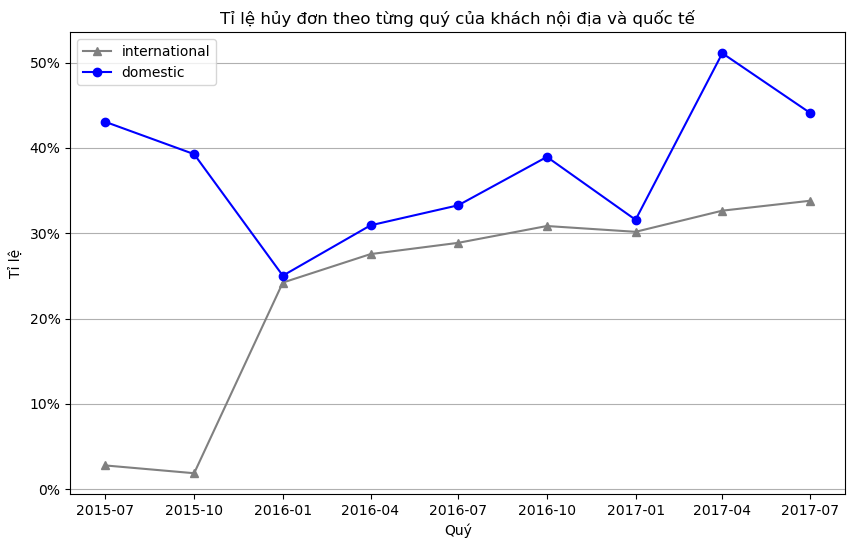

In [179]:
def percent(x, pos):
    return f"{x:.0f}%"


cancel_ratio["quarter_year_tst"] = cancel_ratio["quarter_year"].dt.to_timestamp()


plt.figure(figsize=(10, 6))
plt.plot(
    cancel_ratio["quarter_year_tst"],
    cancel_ratio["international"],
    label="international",
    marker="^",
    color="gray",
)
plt.plot(
    cancel_ratio["quarter_year_tst"],
    cancel_ratio["domestic"],
    label="domestic",
    marker="o",
    color="blue",
)


plt.title("Tỉ lệ hủy đơn theo từng quý của khách nội địa và quốc tế")
plt.grid(axis="y")
plt.ylabel("Tỉ lệ")
plt.xlabel("Quý")
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(percent))
plt.legend()
plt.show()


- Từ biểu đồ nhận thấy tỉ lệ hủy đơn qua các quý của khách nội địa cao hơn so với khách quốc tế


### Thực hiện kiểm định như sau:

- H0: Trung bình tỉ lệ hủy đơn trong 1 tuần của khách nội địa và quốc tế là như nhau
- H1: Trung bình tỉ lệ hủy đơn trong 1 tuần của khách nội địa lớn hơn khách quốc tế
- alpha = 0.05

- Lí do chọn 1 tuần mà không phải 1 tháng hay quý: để khảo sát ở khoảng thời gian hẹp hơn khi đó có nhiều mẫu để thực hiện kiểm định


#### Tính số đơn hủy qua các tuần của khách nội địa và khách quốc tế


In [180]:
df["week_year"] = df["arrival_date"].dt.to_period("W")

df_canceled = df[df["is_canceled"] == 1]

num_canceled_order = df_canceled.groupby(["is_domestic", "week_year"]).size().unstack()

num_canceled_order = num_canceled_order.fillna(0)


num_canceled_order


week_year,2015-06-29/2015-07-05,2015-07-06/2015-07-12,2015-07-13/2015-07-19,2015-07-20/2015-07-26,2015-07-27/2015-08-02,2015-08-03/2015-08-09,2015-08-10/2015-08-16,2015-08-17/2015-08-23,2015-08-24/2015-08-30,2015-08-31/2015-09-06,...,2017-06-26/2017-07-02,2017-07-03/2017-07-09,2017-07-10/2017-07-16,2017-07-17/2017-07-23,2017-07-24/2017-07-30,2017-07-31/2017-08-06,2017-08-07/2017-08-13,2017-08-14/2017-08-20,2017-08-21/2017-08-27,2017-08-28/2017-09-03
is_domestic,,,,,,,,,,,,,,,,,,,,,
False,0.0,1.0,1.0,2.0,3.0,3.0,7.0,2.0,3.0,1.0,...,200.0,189.0,197.0,154.0,192.0,188.0,195.0,212.0,135.0,67.0
True,36.0,59.0,53.0,56.0,27.0,41.0,53.0,57.0,46.0,45.0,...,45.0,49.0,38.0,26.0,54.0,38.0,43.0,55.0,52.0,19.0


#### Tính số đơn qua các tuần của khách nội địa và khách quốc tế


In [181]:
num_order = df.groupby(["is_domestic", "week_year"]).size().unstack()

num_order = num_order.fillna(0)

num_order


week_year,2015-06-29/2015-07-05,2015-07-06/2015-07-12,2015-07-13/2015-07-19,2015-07-20/2015-07-26,2015-07-27/2015-08-02,2015-08-03/2015-08-09,2015-08-10/2015-08-16,2015-08-17/2015-08-23,2015-08-24/2015-08-30,2015-08-31/2015-09-06,...,2017-06-26/2017-07-02,2017-07-03/2017-07-09,2017-07-10/2017-07-16,2017-07-17/2017-07-23,2017-07-24/2017-07-30,2017-07-31/2017-08-06,2017-08-07/2017-08-13,2017-08-14/2017-08-20,2017-08-21/2017-08-27,2017-08-28/2017-09-03
is_domestic,,,,,,,,,,,,,,,,,,,,,
False,0.0,1.0,1.0,13.0,35.0,112.0,155.0,150.0,89.0,216.0,...,587.0,575.0,584.0,511.0,549.0,533.0,523.0,581.0,461.0,201.0
True,52.0,81.0,76.0,105.0,52.0,116.0,166.0,130.0,121.0,135.0,...,93.0,108.0,100.0,62.0,108.0,89.0,103.0,125.0,97.0,61.0


#### Tỉ lệ hủy đơn qua các tuần của khách nội địa và khách quốc tế


In [182]:
cancel_ratio = num_canceled_order / num_order * 100

cancel_ratio = cancel_ratio.round(2)

cancel_ratio


week_year,2015-06-29/2015-07-05,2015-07-06/2015-07-12,2015-07-13/2015-07-19,2015-07-20/2015-07-26,2015-07-27/2015-08-02,2015-08-03/2015-08-09,2015-08-10/2015-08-16,2015-08-17/2015-08-23,2015-08-24/2015-08-30,2015-08-31/2015-09-06,...,2017-06-26/2017-07-02,2017-07-03/2017-07-09,2017-07-10/2017-07-16,2017-07-17/2017-07-23,2017-07-24/2017-07-30,2017-07-31/2017-08-06,2017-08-07/2017-08-13,2017-08-14/2017-08-20,2017-08-21/2017-08-27,2017-08-28/2017-09-03
is_domestic,,,,,,,,,,,,,,,,,,,,,
False,NaN,100.00,100.00,15.38,8.57,2.68,4.52,1.33,3.37,0.46,...,34.07,32.87,33.73,30.14,34.97,35.27,37.28,36.49,29.28,33.33
True,69.23,72.84,69.74,53.33,51.92,35.34,31.93,43.85,38.02,33.33,...,48.39,45.37,38.00,41.94,50.00,42.70,41.75,44.00,53.61,31.15


#### Kiểm tra có giá trị nan không


In [183]:
null_values = cancel_ratio.applymap(lambda x: pd.isnull(x)).stack()


null_values = null_values[null_values]

null_values


is_domestic  week_year            
False        2015-06-29/2015-07-05    True
dtype: bool

- Lí do có giá trị nan là tại thời điểm đó, không có đơn đặt nên mẫu không tồn tại


#### Tiến hành bỏ mẫu không hợp lệ đi


In [184]:
def drop_na_in_list(lst):
    lst = pd.Series(lst)
    lst = lst.dropna()
    return list(lst)


cancel_ratio = cancel_ratio.apply(lambda x: x.tolist(), axis=1)

cancel_ratio = cancel_ratio.apply(lambda x: drop_na_in_list(x))

cancel_ratio


is_domestic
False    [100.0, 100.0, 15.38, 8.57, 2.68, 4.52, 1.33, ...
True     [69.23, 72.84, 69.74, 53.33, 51.92, 35.34, 31....
dtype: object

#### Tính trung bình tỉ lệ hủy đơn trong 1 tuần của khách nội địa và khách quốc tế


In [185]:
mean_by_origin = cancel_ratio.apply(lambda x: np.mean(x))
mean_by_origin


is_domestic
False    25.082832
True     37.829649
dtype: float64

#### Tạo hàm tính thống kê kiểm định


In [186]:
def get_statistic(sample_a, sample_b):
    return np.mean(sample_a) - np.mean(sample_b)


#### Thực hiện kiểm định bằng permutation test


In [187]:
p_value = stats.permutation_test(
    (cancel_ratio[True], cancel_ratio[False]),
    statistic=get_statistic,
    n_resamples=1000000,
    alternative="greater",
).pvalue

p_value


9.99999000001e-07

- Giá trị p_value < 0.05 nên có cơ sở khẳng định trung bình tỉ lệ hủy đơn trong 1 tuần của khách nội địa lớn hơn khách quốc tế

- Từ biểu đồ tỉ lệ hủy đơn theo quý và kết quả kiểm định như trên, có thể khẳng định rằng khách nội địa có xu hướng hủy đơn nhiều hơn so với khách quốc tế

- Ý nghĩa: Việc khách nội địa có xu hướng hủy đơn nhiều hơn chứng tỏ dịch vụ của khách sạn vẫn chưa thực sự tốt, chính vì vậy, khách sạn cần cải thiện chất lượng dịch vụ để đáp ứng với yêu cầu của khách nội địa tốt hơn, vì thị trường nội địa đóng vai trò quan trọng trong sự phát triển của khách sạn.


## III) THỜI ĐIỂM NÀO KHÁCH HÀNG CÓ KHẢ NĂNG ĐẶT PHÒNG NHƯ Ý NHIỀU NHẤT (ƯỚC LƯỢNG THÁNG ĐỘ TIN CẬY 95%)


### Tính số đơn như ý theo từng tháng


In [188]:
df["month"] = df["arrival_date"].dt.month

df_assign_like_order = df[df["assigned_room_type"] == df["reserved_room_type"]]

num_order_assign_like_order_by_month = (
    df_assign_like_order["month"].value_counts().sort_index()
)

num_order_assign_like_order_by_month


1     2498
2     3186
3     4271
4     4583
5     4869
6     4561
7     5225
8     5979
9     3442
10    3537
11    2529
12    2638
Name: month, dtype: int64

### Tính số đơn theo từng tháng


In [189]:
num_order_by_month = df["month"].value_counts().sort_index()

num_order_by_month


1     2730
2     3604
3     4854
4     5078
5     5411
6     5004
7     5741
8     6586
9     4238
10    4208
11    2942
12    3014
Name: month, dtype: int64

### Tỉ lệ phần trăm đơn đặt được như ý theo từng tháng


In [190]:
percent_num_order_assign_like_order_by_month = (
    num_order_assign_like_order_by_month / num_order_by_month * 100
)
percent_num_order_assign_like_order_by_month = (
    percent_num_order_assign_like_order_by_month.round(2)
)


percent_num_order_assign_like_order_by_month


1     91.50
2     88.40
3     87.99
4     90.25
5     89.98
6     91.15
7     91.01
8     90.78
9     81.22
10    84.05
11    85.96
12    87.52
Name: month, dtype: float64

### Gộp lại thành bảng


In [191]:
num_order_assign_like_order_by_month = num_order_assign_like_order_by_month.to_frame(
    name="num_order_assign_like_order"
)
num_order_by_month = num_order_by_month.to_frame(name="num_order")
percent_num_order_assign_like_order_by_month = (
    percent_num_order_assign_like_order_by_month.to_frame(name="percent")
)

table = pd.concat(
    [
        num_order_assign_like_order_by_month,
        num_order_by_month,
        percent_num_order_assign_like_order_by_month,
    ],
    axis=1,
)

table


,num_order_assign_like_order,num_order,percent
1,2498,2730,91.50
2,3186,3604,88.40
3,4271,4854,87.99
4,4583,5078,90.25
5,4869,5411,89.98
6,4561,5004,91.15
7,5225,5741,91.01
8,5979,6586,90.78
9,3442,4238,81.22
10,3537,4208,84.05


### Tìm khoảng tin cậy cho tỉ lệ đơn như ý theo từng tháng


#### Tìm số đơn đặt không như ý theo từng tháng


In [192]:
table["num_order_assign_not_like_order"] = (
    table["num_order"] - table["num_order_assign_like_order"]
)


#### Tạo danh sách gồm 2 số 1 và 0, 1: như ý và 0: không như ý


In [193]:
# 1: đơn được như ý và 0: là không như ý
list_1_by_month = table["num_order_assign_like_order"].apply(lambda x: [1] * x)
list_0_by_month = table["num_order_assign_not_like_order"].apply(lambda x: [0] * x)

list_1_and_0_by_month = list_1_by_month + list_0_by_month

list_1_and_0_by_month


1     [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...
2     [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...
3     [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...
4     [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...
5     [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...
6     [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...
7     [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...
8     [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...
9     [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...
10    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...
11    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...
12    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...
dtype: object

#### Thực hiện ước lượng khoảng tin cậy cho tỉ lệ đặt đơn như ý trong từng tháng


In [194]:
def get_ci_for_ratio(sample):
    res = stats.bootstrap(
        (sample,), np.mean, confidence_level=0.95, n_resamples=100000
    ).confidence_interval

    res = [round(item * 100, 2) for item in res]

    return res


ci_for_ratio_by_month = list_1_and_0_by_month.apply(lambda x: get_ci_for_ratio(x))

ci_for_ratio_by_month


1      [90.4, 92.53]
2      [87.32, 89.4]
3      [87.04, 88.9]
4     [89.41, 91.04]
5     [89.17, 90.76]
6     [90.33, 91.93]
7     [90.26, 91.73]
8     [90.05, 91.47]
9     [80.01, 82.37]
10    [82.91, 85.15]
11    [84.67, 87.19]
12    [86.33, 88.69]
dtype: object

#### Tổng hợp vào trong bảng


In [195]:
table["lower_ratio_bound"] = ci_for_ratio_by_month.apply(lambda x: x[0])
table["upper_ratio_bound"] = ci_for_ratio_by_month.apply(lambda x: x[1])

table


,num_order_assign_like_order,num_order,percent,num_order_assign_not_like_order,lower_ratio_bound,upper_ratio_bound
1,2498,2730,91.50,232,90.40,92.53
2,3186,3604,88.40,418,87.32,89.40
3,4271,4854,87.99,583,87.04,88.90
4,4583,5078,90.25,495,89.41,91.04
5,4869,5411,89.98,542,89.17,90.76
6,4561,5004,91.15,443,90.33,91.93
7,5225,5741,91.01,516,90.26,91.73
8,5979,6586,90.78,607,90.05,91.47
9,3442,4238,81.22,796,80.01,82.37
10,3537,4208,84.05,671,82.91,85.15


### Vẽ biểu đồ minh họa cho khoảng tin cậy 95% tỉ lệ đặt đơn như ý theo từng tháng và biểu đồ số đơn đặt theo từng tháng


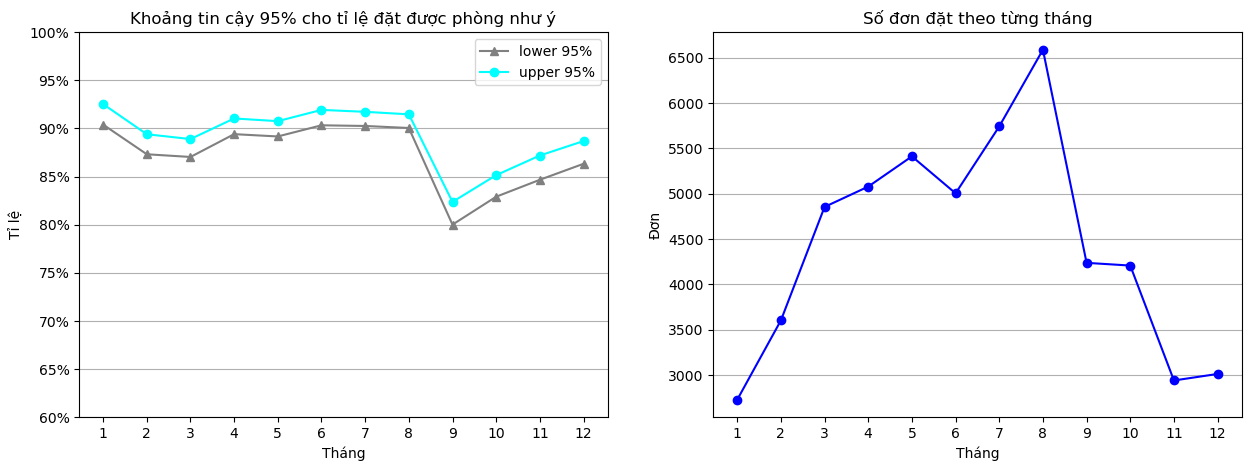

In [196]:
def percent(x, pos):
    return f"{x:.0f}%"


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# Vẽ biểu đồ khoảng tin cậy cho tỉ lệ
ax = axes[0]
ax.plot(
    table.index, table["lower_ratio_bound"], marker="^", label="lower 95%", color="grey"
)
ax.plot(
    table.index, table["upper_ratio_bound"], marker="o", label="upper 95%", color="cyan"
)


ax.set_xticks(table.index)
ax.set_xlabel("Tháng")
ax.set_ylabel("Tỉ lệ")
ax.set_title("Khoảng tin cậy 95% cho tỉ lệ đặt được phòng như ý")
ax.legend()
ax.grid(axis="y")
ax.set_ylim(60, 100)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(percent))

# Vẽ biểu đồ số đơn đặt theo từng tháng
ax = axes[1]
ax.plot(table.index, table["num_order"], marker="o", color="blue")

ax.set_xticks(table.index)
ax.set_xlabel("Tháng")
ax.set_ylabel("Đơn")
ax.set_title("Số đơn đặt theo từng tháng")
ax.grid(axis="y")

plt.show()


- Từ biểu đồ, ta thấy khả năng đặt được phòng như ý từ tháng 1 đến tháng 8 khá ổn định quanh mức 90%, khá ấn tượng, còn đối với khoảng thời gian cuối năm khả năng đặt được phòng nhìn chung giảm, điều này chứng tỏ với vai trò là khách hàng, nên xem xét việc đặt khách sạn ở khoảng thời gian đầu năm để việc đặt phòng được như ý, qua đó tăng tính trải nghiệm cho chuyến đi

- Với vai trò là khách sạn, cần tìm hiểu nguyên nhân tại sao ở thời điểm cuối năm, số đơn đặt phòng ít nhưng tỉ lệ đặt phòng như ý là thấp hơn so với khoảng thời gian trước đó, đặc biệt tháng 6, 7, 8 khi đó số đơn đặt nhiều hơn nhưng tỉ lệ đặt phòng như ý lại cao. Qua đó khách sạn cần cải thiện chất lượng phục vụ khách hàng, tăng tỉ lệ đặt phòng như ý nhằm đảm bảo sự hài lòng của khách hàng ở mức cao nhất


## IV) KHÁCH HÀNG THÍCH ĐẾN VÀO NGÀY TRONG TUẦN HAY CUỐI TUẦN ?


### Tạo cột is_weekend: Ngày đến có phải là vào cuối tuần


In [197]:
df["week_day"] = df["arrival_date"].dt.weekday

df["is_weekend"] = df["week_day"].isin([5, 6]).astype("int")

df["is_weekend"]


33955    0
33956    0
33957    0
33958    0
33959    0
        ..
87360    0
87361    0
87362    0
87363    0
87364    0
Name: is_weekend, Length: 53410, dtype: int32

### Tính số đơn đặt theo từng tuần


In [198]:
df["week_year"] = df["arrival_date"].dt.to_period("W")

num_order_by_week = df["week_year"].value_counts().sort_index()
num_order_by_week


2015-06-29/2015-07-05     52
2015-07-06/2015-07-12     82
2015-07-13/2015-07-19     77
2015-07-20/2015-07-26    118
2015-07-27/2015-08-02     87
                        ... 
2017-07-31/2017-08-06    622
2017-08-07/2017-08-13    626
2017-08-14/2017-08-20    706
2017-08-21/2017-08-27    558
2017-08-28/2017-09-03    262
Freq: W-SUN, Name: week_year, Length: 114, dtype: int64

### Chuyển thành bảng


In [199]:
num_order_by_week = num_order_by_week.to_frame(name="count").reset_index(names="week")

num_order_by_week


,week,count
0,2015-06-29/2015-07-05,52
1,2015-07-06/2015-07-12,82
2,2015-07-13/2015-07-19,77
3,2015-07-20/2015-07-26,118
4,2015-07-27/2015-08-02,87
...,...,...
109,2017-07-31/2017-08-06,622
110,2017-08-07/2017-08-13,626
111,2017-08-14/2017-08-20,706
112,2017-08-21/2017-08-27,558


### Tính số đơn đặt vào cuối tuần theo từng tuần


In [200]:
df_weekend = df[df["is_weekend"] == 1]

num_weekend_order_by_week = df_weekend["week_year"].value_counts().sort_index()
num_weekend_order_by_week


2015-06-29/2015-07-05     18
2015-07-06/2015-07-12     21
2015-07-13/2015-07-19     26
2015-07-20/2015-07-26     48
2015-07-27/2015-08-02     21
                        ... 
2017-07-24/2017-07-30    190
2017-07-31/2017-08-06    143
2017-08-07/2017-08-13    184
2017-08-14/2017-08-20    192
2017-08-21/2017-08-27    179
Freq: W-SUN, Name: week_year, Length: 113, dtype: int64

### Chuyển thành bảng


In [201]:
num_weekend_order_by_week = num_weekend_order_by_week.to_frame(
    name="count"
).reset_index(names="week")

num_weekend_order_by_week


,week,count
0,2015-06-29/2015-07-05,18
1,2015-07-06/2015-07-12,21
2,2015-07-13/2015-07-19,26
3,2015-07-20/2015-07-26,48
4,2015-07-27/2015-08-02,21
...,...,...
108,2017-07-24/2017-07-30,190
109,2017-07-31/2017-08-06,143
110,2017-08-07/2017-08-13,184
111,2017-08-14/2017-08-20,192


### Gộp lại thành 1 bảng


In [202]:
num_weekend_order_by_week = num_weekend_order_by_week.rename(
    columns={"count": "weekend_count"}
)

table_by_week = pd.merge(
    num_order_by_week, num_weekend_order_by_week, on="week", how="left"
)

table_by_week


,week,count,weekend_count
0,2015-06-29/2015-07-05,52,18.0
1,2015-07-06/2015-07-12,82,21.0
2,2015-07-13/2015-07-19,77,26.0
3,2015-07-20/2015-07-26,118,48.0
4,2015-07-27/2015-08-02,87,21.0
...,...,...,...
109,2017-07-31/2017-08-06,622,143.0
110,2017-08-07/2017-08-13,626,184.0
111,2017-08-14/2017-08-20,706,192.0
112,2017-08-21/2017-08-27,558,179.0


### Lấp các giá trị nan trong cột weekend_count bằng 0


In [203]:
table_by_week["weekend_count"] = table_by_week["weekend_count"].fillna(0)


### Tính cột tỉ lệ phần trăm


In [204]:
table_by_week["percent"] = table_by_week["weekend_count"] / table_by_week["count"] * 100
table_by_week["percent"] = table_by_week["percent"].round(2)

table_by_week


,week,count,weekend_count,percent
0,2015-06-29/2015-07-05,52,18.0,34.62
1,2015-07-06/2015-07-12,82,21.0,25.61
2,2015-07-13/2015-07-19,77,26.0,33.77
3,2015-07-20/2015-07-26,118,48.0,40.68
4,2015-07-27/2015-08-02,87,21.0,24.14
...,...,...,...,...
109,2017-07-31/2017-08-06,622,143.0,22.99
110,2017-08-07/2017-08-13,626,184.0,29.39
111,2017-08-14/2017-08-20,706,192.0,27.20
112,2017-08-21/2017-08-27,558,179.0,32.08


### Ước lượng khoảng tin cậy cho trung bình tỉ lệ phần trăm đơn được đặt vào cuối tuần trong 1 tuần


In [205]:
ci = stats.bootstrap(
    (table_by_week["percent"],),
    np.mean,
    confidence_level=0.95,
    n_resamples=1000000,
    method="percentile",
).confidence_interval

ci = [round(item, 2) for item in ci]

ci


[25.88, 28.27]

- Ý nghĩa: Như vậy khoảng tin cậy cho tỉ lệ phần trăm đơn được đặt vào cuối tuần trong 1 tuần là hoàn toàn nhỏ hơn 50%, từ đó kết luận khách hàng có xu hướng đặt đơn vào ngày trong tuần từ thứ Hai đến thứ Sáu, điều này giúp khách sạn có thể phân bổ nguồn lực hợp lí hơn, tập trung nhiều hơn vào các ngày trong tuần để phục vụ khách hàng tốt hơn, qua đó tăng sự thỏa mãn của khách hàng đối với dịch vụ của khách sạn.


## V) KÊNH PHÂN PHỐI NÀO ĐÓNG GÓP DOANH THU NHIỀU NHẤT (TÍNH THEO TỪNG THÁNG, VẼ BIỂU ĐỒ MIỀN


### Tính lợi nhuận của từng kênh phân phối theo từng tháng


In [206]:
df_defined_not_canceled = df[
    (df["distribution_channel"] != "Undefined") & (df["is_canceled"] == 0)
]
df_defined_not_canceled["month"] = df_defined_not_canceled["arrival_date"].dt.month

revenue_by_month = (
    df_defined_not_canceled.groupby(["month", "distribution_channel"])["revenue"]
    .sum()
    .unstack()
)

revenue_by_month = revenue_by_month.fillna(0)

revenue_by_month


distribution_channel,Corporate,Direct,GDS,TA/TO
month,,,,
1,20425.09,63124.42,2071.50,393765.54
2,18338.99,92471.59,2772.99,568563.71
3,29368.03,100619.01,1747.20,827002.09
4,28728.80,156961.15,1259.00,983973.29
5,72854.89,144849.59,4698.60,1079691.27
6,57713.66,147789.58,4563.00,1016784.23
7,21868.99,200019.76,1594.99,1238343.14
8,17537.00,282002.55,853.00,1437918.09
9,37924.55,118763.09,1317.00,896868.10


### Tính tỉ lệ phần trăm lợi nhuận của từng kênh phân phối theo từng tháng


In [207]:
revenue_by_month_pct = (
    revenue_by_month.divide(revenue_by_month.sum(axis=1), axis=0) * 100
)
revenue_by_month_pct


distribution_channel,Corporate,Direct,GDS,TA/TO
month,,,,
1,4.260672,13.167749,0.432115,82.139463
2,2.688421,13.555957,0.406509,83.349113
3,3.063202,10.494962,0.182240,86.259597
4,2.453519,13.404917,0.107522,84.034042
5,5.595208,11.124354,0.360849,82.919588
6,4.704213,12.046259,0.371928,82.877600
7,1.496004,13.682862,0.109109,84.712024
8,1.008853,16.222794,0.049071,82.719283
9,3.595178,11.258523,0.124849,85.021450


### Vẽ biểu đồ miền


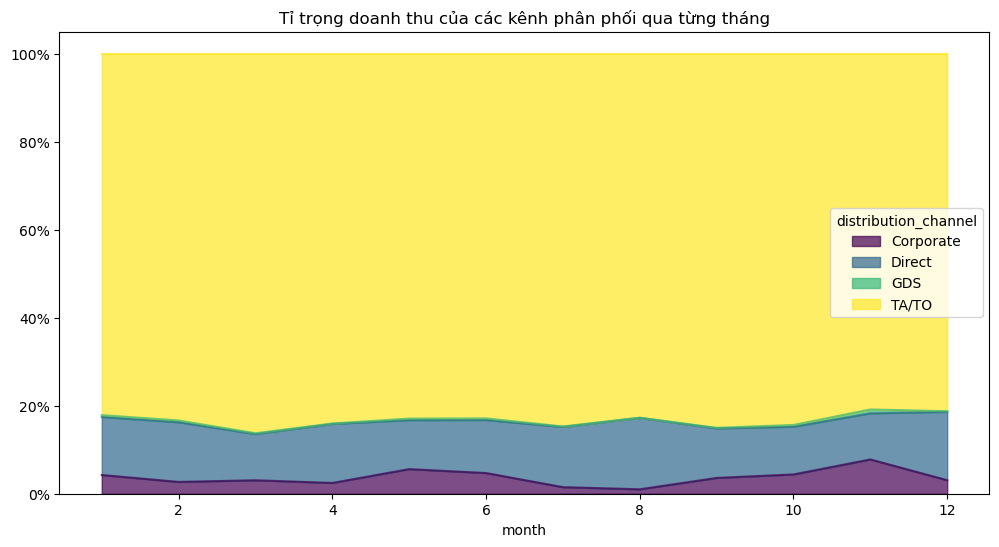

In [208]:
revenue_by_month_pct.plot(
    kind="area", stacked=True, figsize=(12, 6), colormap="viridis", alpha=0.7
)
plt.title("Tỉ trọng doanh thu của các kênh phân phối qua từng tháng")
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(percent))

plt.show()


- Từ biểu đồ, ta kết luận được kênh phân phối TA/TO đóng góp phần lớn tỉ trọng vào doanh thu của khách sạn, như vậy khách sạn cần tập trung đầu tư vào kênh này để thu hút được nhiều khách hàng hơn


## VI) SO SÁNH TỈ LỆ HỦY ĐƠN GIỮA KHÁCH HÀNG CÓ TIỀN SỬ HỦY ĐƠN VÀ KHÔNG CÓ


### Tạo thống kê cho khách hàng có tiền sử hủy đơn và không có


In [209]:
df["did_cancel"] = (df["previous_cancellations"] > 0).astype("int")

num_order = df.groupby(["is_canceled", "did_cancel"]).size().unstack()

num_order


did_cancel,0,1
is_canceled,,
0,36997,370
1,15235,808


### Tính tỉ lệ hủy đơn giữa khách hàng có tiền sử hủy đơn và không có


In [210]:
num_order_t = num_order.T.copy()

num_order_t["percent"] = num_order_t[1] / (num_order_t[0] + num_order_t[1]) * 100
num_order_t = num_order_t["percent"]
num_order_t


did_cancel
0    29.167943
1    68.590832
Name: percent, dtype: float64

### Thực hiện kiểm định:

- H0: tỉ lệ hủy đơn giữa khách hàng có tiền sử hủy đơn = không có
- H1: tỉ lệ hủy đơn giữa khách hàng có tiền sử hủy đơn > không có


In [211]:
def get_statistic(x, y):
    return np.mean(x) - np.mean(y)


list_10_did_cancel_in_past = [1] * num_order.loc[1, 1] + [0] * num_order.loc[0, 1]
list_10_not_did_cancel_in_past = [1] * num_order.loc[1, 0] + [0] * num_order.loc[0, 0]

p_value = 0

for i in range(10):
    result = stats.permutation_test(
        (list_10_did_cancel_in_past, list_10_not_did_cancel_in_past),
        statistic=get_statistic,
        n_resamples=10000,
        alternative="greater",
    ).pvalue

    p_value += result

p_value = p_value / 10
p_value


KeyboardInterrupt: 

- Ý nghĩa: p_value nhỏ hơn alpha nên có cơ sở khằng định tỉ lệ hủy đơn giữa khách hàng có tiền sử hủy đơn lớn hơn khách hàng không có, như vậy khách sạn cần tập trung cải tiến chất lượng phục vụ của mình, xem xét những điểm yếu cần khắc phục để tránh tình trạng khách hàng có tiền sử hủy đơn trước đây vẫn tiếp tục hủy đơn, gây ảnh hưởng đến danh tiếng và doanh thu của khách sạn.
